In [593]:
import sys
sys.path.append("/Users/rohan/public_html/Hegemon")
%load_ext autoreload
%autoreload 2
import StepMiner as smn
import HegemonUtil as hu
import re
import numpy as np
import scipy
import math
import itertools
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.stats.proportion
import statistics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [423]:
%reload_ext autoreload

# SRCCA and Boolean Analysis of Voigt 2020 Retina Dataset

### [Go to results](#results)
### [Go to reproduction](#reproduce)
### [Check cone specificity](#specific)
### [Check rod specificity](#rods)
#### [Some important functions](#func)

In [168]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "B6"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

In [331]:
def getBooleanRels(gene1, gene2, arr=None):
    res1 = h.getBooleanRelations(gene1, arr)
    res2 = h.getBooleanRelations(gene2, arr)

    l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res1]
    l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res2]
    l3 = [i[0] for i in l1]
    l4 = [i[0] for i in l2]
    print (dict((x,l3.count(x)) for x in set(l3)))
    print (dict((x,l4.count(x)) for x in set(l4)))
    res3 = [res1[i][1] for i in range(len(res1)) \
            if (l3[i] == 2 or l3[i] == 5) and \
            (l4[i] == 3 or l4[i] == 5)]
    return(res3)

def getBooleanRels2(gene1, gene2, sthr=2.5, pthr=0.35, arr=None):
    res1 = h.getBooleanRelations(gene1, arr)
    res2 = h.getBooleanRelations(gene2, arr)

    l1 = [hu.getBooleanRelationType(i[2], sthr, pthr) for i in res1]
    l2 = [hu.getBooleanRelationType(i[2], sthr, pthr) for i in res2]
    l3 = [i[0] for i in l1]
    l4 = [i[0] for i in l2]
    print (dict((x,l3.count(x)) for x in set(l3)))
    print (dict((x,l4.count(x)) for x in set(l4)))
    res3 = [res1[i][1] for i in range(len(res1)) \
            if (l3[i] == 2 or l3[i] == 5) and \
            (l4[i] == 3 or l4[i] == 5)]
    return(res3)

def getBaitStats(db, dbid, idstr1, sthr=2.5, pthr=0.35, arr=None):
    db = hu.Database(db)
    h = hu.Hegemon(db.getDataset(dbid))
    h.init()
    h.initPlatform()
    h.initSurv()
    bait_dict = {}
    print(idstr1)
    bait_list = itertools.permutations(idstr1, 2)
    for a in bait_list:
        res1 = h.getBooleanRelations2(a[0], arr)
        res2 = h.getBooleanRelations2(a[1], arr)
        l1 = [hu.getBooleanRelationType(i[2], sthr, pthr) for i in res1]
        l2 = [hu.getBooleanRelationType(i[2], sthr, pthr) for i in res2]
        l3 = [i[0] for i in l1]
        l4 = [i[0] for i in l2]
        res3 = [res1[i][1] for i in range(len(res1)) \
                if (l3[i] == 2 or l3[i] == 5) and \
                (l4[i] == 3 or l4[i] == 5)]

        res3 = set(res3)
        res4 = list(set(idstr1).difference(set(res3))) # no. of starred genes omitted 
        bait_dict[a] = [len(res4), len(res3)] #[no. of starred genes omitted, total number of genes]
    return(bait_dict)

In [184]:
def sortCorr(Gene_corr):
    sorted_Gene = sorted(Gene_corr, 
                         key=lambda x: -1 if math.isnan((x[2])) 
                         else x[2], reverse = True)    
    return(sorted_Gene)

Definition of getAllSRCC(self, id1, order) added to HegemonUtil.

In [364]:
celltype = h.getSurvName("c cell type")
air = h.getSurvName("c AIR_status")
rod = np.array([i for i in h.aRange() if ("rod" in atype[i].lower()) and (air[i] == "no")])
cone = np.array([i for i in h.aRange() if "cone" in atype[i].lower() and (air[i] == "no")])

## Cone Photoreceptors

### Correlation

In [284]:
#Fig. 6 Cones
Phillips_Cone_PR_1 = ['ARR3','GNAT2','GNB3', 'GNGT2', 'PDE6H'] #gold standard cone-specific genes
Phillips_Cone_PR_2 = ['AIPL1', 'CADM2', 'CPE', 'DST', 'FAM123A', 'GUCA1A', 'LPCAT1', 'NEUROD4', 'PLEKHB1', 'RCVRN', 
                      'RXRG', 'SLC40A1', 'SYT1', 'ANKRD33B', 'CDHR1', 'CPLX4', 'EGFLAM', 'GABRR2', 'IMPG1', 'MAK', 
                      'OTX2', 'PRDM1', 'RD3', 'SEPT4', 'SLC6A6', 'THRB', 'ARL6', 'CERKL', 'CRX', 'EML1', 'GNAT2', 
                      'IMPG2', 'MAOA', 'PDC', 'PROM1', 'RP1', 'SGIP1', 'SNAP25', 'UNC119', 'ARR3', 'CHRNA3', 'DCT', 
                      'ENO2', 'GNB3', 'KCNV2', 'MPP4', 'PDE6H', 'RAPGEF4', 'RPGRIP1', 'SLC17A7', 'STX3', 'USH2A', 
                      'CACNB2', 'CHRNA5', 'DLG4', 'EYS', 'GNGT2', 'LBH', 'NEUROD1', 'PEX5L', 'RBP3', 'RS1', 'SLC1A7', 
                      'SYP', 'VTN'] #known cone/PR genes
Phillips_Cone_PR_3 = ['AKAP9', 'ARMC9', 'C8orf46', 'CADPS', 'FGF12', 'FSTL5', 'ISOC1', 'NCKAP5', 'PRICKLE2', 'SCN3B',
                      'SLC38A5', 'TRAK2', 'TUBA4A', 'COBLL1', 'FMN1', 'GALNT13', 'LGALSL', 'NPTX1', 'RALGPS2', 
                      'SEMA3C', 'STXBP5L', 'TRIM36', 'XRCC4', 'FAM57B', 'FRMPD1', 'GPC5', 'MEGF9', 'PCBP4', 'ROBO2',
                      'SH3GL2', 'TPD52', 'TTC39C'] #new high confidence genes
Phillips_Cone_PR = ['AIPL1','CADM2','CPE','DST', 'FAM123A', 'GUCA1A', 'LPCAT1', 'NEUROD4','PLEKHB1', 'RCVRN', 'RXRG', 
                    'SLC40A1', 'SYT1', 'ANKRD33B', 'CDHR1', 'CPLX4', 'EGFLAM', 'GABRR2', 'IMPG1', 'MAK', 'OTX2',
                    'PRDM1', 'RD3', 'SEPT4', 'SLC6A6', 'THRB', 'ARL6', 'CERKL', 'CRX', 'EML1', 'GNAT2', 'IMPG2',
                    'MAOA', 'PDC', 'PROM1', 'RP1', 'SGIP1', 'SNAP25', 'UNC119', 'ARR3', 'CHRNA3', 'DCT', 'ENO2',
                    'GNB3','KCNV2','MPP4', 'PDE6H', 'RAPGEF4', 'RPGRIP1', 'SLC17A7', 'STX3', 'USH2A', 'CACNB2',
                    'CHRNA5', 'DLG4', 'EYS', 'GNGT2', 'LBH', 'NEUROD1', 'PEX5L', 'RBP3', 'RS1', 'SLC1A7', 'SYP',
                    'VTN', 'AKAP9', 'ARMC9', 'C8orf46', 'CADPS', 'FGF12', 'FSTL5', 'ISOC1', 'NCKAP5', 'PRICKLE2', 'SCN3B',
                    'SLC38A5', 'TRAK2', 'TUBA4A', 'COBLL1', 'FMN1', 'GALNT13', 'LGALSL', 'NPTX1', 'RALGPS2', 'SEMA3C', 
                    'STXBP5L', 'TRIM36', 'XRCC4', 'FAM57B', 'FRMPD1', 'GPC5', 'MEGF9', 'PCBP4', 'ROBO2', 'SH3GL2', 'TPD52',
                    'TTC39C'] #all
#set(Phillips_Cone_PR).difference(CRX_RXRG_THRB_PRDM1)

Whole dataset, GNAT2 and ARR3 as Bait Genes for Correlation:

In [162]:
res = h.getAllSRCC("ARR3")

In [269]:
ARR3 = sortCorr(res)
ARR3_200 = np.array([i[0] for i in ARR3_corr[1:200]])
Gnat2 = h.getAllSRCC("GNAT2")
Gnat2 = sortCorr(Gnat2)
Gnat2_200 = np.array([i[0] for i in ARR3_corr[1:200]])

In [399]:
print(sorted(set(ARR3_200).intersection(Gnat2_200)))

['ABCA4', 'ABCC5', 'AC000124.1', 'AC007349.7', 'AC104667.3', 'ADCY1', 'AGPAT3', 'AIPL1', 'AKAP9', 'ANKRD33', 'ANKRD45', 'AP1S3', 'ARMC9', 'C7orf33', 'C9orf135', 'CABP4', 'CASZ1', 'CC2D2A', 'CCDC60', 'CDHR1', 'CEP170B', 'CHRNA3', 'CNGA3', 'CNGB1', 'CNGB3', 'COTL1', 'CPLX4', 'CROT', 'CRX', 'CTD-2034I21.1', 'CTD-2034I21.2', 'CTD-2050N2.1', 'CTD-2196E14.3', 'CTD-2521M24.11', 'DDIT4L', 'DDX10', 'DIAPH2-AS1', 'DOCK8', 'DPF3', 'DPP4', 'DPYSL3', 'DSCR8', 'DZIP3', 'ECT2', 'EGFLAM', 'ELOVL2', 'ENO2', 'EYS', 'FAIM', 'FAM179A', 'FAM213A', 'FAM57B', 'FHOD3', 'FRMD4B', 'FRMPD1', 'GNAT2', 'GNB3', 'GNGT2', 'GPATCH1', 'GRK1', 'GRK7', 'GUCA1A', 'GUCA1B', 'GUCA1C', 'GUK1', 'HEG1', 'HK2', 'HRASLS', 'IMPG1', 'IMPG2', 'ISL2', 'ITGA6', 'KCNB2', 'KCNV2', 'KIF2A', 'KLHL41', 'LBH', 'LIMA1', 'LINC00575', 'LINC00871', 'LIPG', 'LMOD1', 'LRFN2', 'MAK', 'MAP2', 'MAP3K19', 'MAPKBP1', 'MATK', 'MCF2', 'MEGF9', 'MEIS2', 'MESP2', 'MLXIP', 'MPP4', 'MPP6', 'MRVI1-AS1', 'MYBPHL', 'MYL4', 'MYLK', 'MYO3B', 'NANOS1', 'NOS1AP',

Only cells labelled as healthy cones, GNAT2 and ARR3 as Bait Genes for Correlation:

In [265]:
Arr3_cone = h.getAllSRCC("ARR3", order=cone)
Arr3_cone = sortCorr(Arr3_cone)
Arr3_cone_200 = np.array([i[0] for i in Arr3_cone[1:200]])
Gnat2_cone = h.getAllSRCC("GNAT2", order=cone)
Gnat2_cone = sortCorr(Gnat2_cone)
Gnat2_cone_200 = np.array([i[0] for i in Gnat2_cone[1:200]])

In [404]:
print(sorted(set(Arr3_cone_200).intersection(Gnat2_cone_200)))

['ALDOC', 'AMPD2', 'ANKRD33', 'ARMC9', 'ASPH', 'ATP5G3', 'BNIP3L', 'CABP4', 'CAMK1D', 'CC2D2A', 'CHCHD2', 'CHRNA3', 'CKB', 'COPS5', 'COX14', 'CPLX4', 'CROT', 'DARS', 'EPB41L2', 'FAIM', 'FAM162A', 'FAM213A', 'FMN1', 'GADD45GIP1', 'GHITM', 'GNB3', 'GNGT2', 'GPATCH1', 'GUCA1A', 'GUK1', 'H3F3A', 'HEG1', 'HK2', 'HMGN1', 'HSPA1B', 'IER3IP1.1', 'IMPG1', 'ITM2C', 'KCNV2', 'LBH', 'LIMA1', 'LYPLA1', 'MAK', 'MIF', 'NDUFA1', 'NXNL1', 'OPN1LW', 'ORMDL1', 'PCNA', 'PDC', 'PDE6H', 'PEX5L', 'PFKFB3', 'PGAM1', 'PKM', 'PLEKHB1', 'POLE4', 'POU2AF1', 'PPA1', 'PRCD', 'PRDX1', 'PRDX2', 'PRMT1', 'PRPH2', 'RCVRN', 'RDH12', 'RP11-143P4.2', 'RP11-169K16.9', 'RP1L1', 'RS1', 'RTBDN', 'SEC62', 'SF3B14', 'SLC25A4', 'SSX2IP', 'STX3', 'TAPT1', 'TMED4', 'TMEM107', 'TMEM230', 'TPD52', 'TPI1', 'TTR', 'TULP1', 'UNC119', 'VDAC2', 'VTN', 'YWHAE']


Other bait genes for correlation

In [391]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "B6"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

Gnb3_voigt = h.getAllSRCC("GNB3")
Gnb3_voigt = sortCorr(Gnb3_voigt)
Gnb3_voigt_200 = np.array([i[0] for i in Gnb3_voigt[1:200]])

Gnat2_voigt = h.getAllSRCC("GNAT2")
Gnat2_voigt = sortCorr(Gnat2_voigt)
Gnat2_voigt_200 = np.array([i[0] for i in Gnat2_voigt[1:200]])

Crx_Gnb3_Gnat2_voigt = set(Crx_200).intersection(Gnat2_voigt_200).intersection(Gnb3_voigt_200)

In [394]:
Gnb3_voigt_cone = h.getAllSRCC("GNB3", order=cone)
Gnb3_voigt_cone = sortCorr(Gnb3_voigt_cone)
Gnb3_voigt_cone_200 = np.array([i[0] for i in Gnb3_voigt_cone[1:200]])

Gnat2_voigt_cone = h.getAllSRCC("GNAT2", order=cone)
Gnat2_voigt_cone = sortCorr(Gnat2_voigt_cone)
Gnat2_voigt_cone_200 = np.array([i[0] for i in Gnat2_voigt_cone[1:200]])

Crx_Gnb3_Gnat2_voigt_cone = set(Crx_cone_200).intersection(Gnat2_voigt_cone_200).intersection(Gnb3_voigt_cone_200)

Whole dataset, Phillips Bait Genes:

In [429]:
%reload_ext autoreload
Crx = h.getAllSRCC("CRX")
Crx = sortCorr(Crx)
Prdm1 = h.getAllSRCC("PRDM1")
Prdm1 = sortCorr(Prdm1)

KeyboardInterrupt: 

In [201]:
Rxrg = h.getAllSRCC("RXRG")
Rxrg = sortCorr(Rxrg)
Thrb = h.getAllSRCC("THRB")
Thrb = sortCorr(Thrb)

In [421]:
Crx_200 = np.array([i[0] for i in Crx[0:200]])
Prdm1_200 = np.array([i[0] for i in Prdm1[0:200]])
Rxrg_200 = np.array([i[0] for i in Rxrg[0:200]])
Thrb_200 = np.array([i[0] for i in Thrb[0:200]])

In [279]:
#empty except with Thrb
set(Crx_200).intersection(Thrb_200)

{'ARL3', 'GUCA1B', 'GUK1', 'MAP2', 'RP11-215G15.5', 'RS1', 'TPD52', 'VOPP1'}

Only cells labelled as healthy cones, Phillips Bait Genes:

In [224]:
Crx_cone = h.getAllSRCC("CRX", order=cone)
Crx_cone = sortCorr(Crx_cone)
Prdm1_cone = h.getAllSRCC("PRDM1", order=cone)
Prdm1_cone = sortCorr(Prdm1_cone)
Rxrg_cone = h.getAllSRCC("RXRG", order=cone)
Rxrg_cone = sortCorr(Rxrg_cone)
Thrb_cone = h.getAllSRCC("THRB", order=cone)
Thrb_cone = sortCorr(Thrb_cone)

In [228]:
Crx_cone_200 = np.array([i[0] for i in Crx_cone[0:200]])
Prdm1_cone_200 = np.array([i[0] for i in Prdm1_cone[0:200]])
Rxrg_cone_200 = np.array([i[0] for i in Rxrg_cone[0:200]])
Thrb_cone_200 = np.array([i[0] for i in Thrb_cone[0:200]])

In [363]:
print(set(Crx_cone_200).intersection(Thrb_cone_200).intersection(Rxrg_cone_200))
print(set(Crx_cone_200).intersection(Prdm1_cone_200).intersection(Rxrg_cone_200).intersection(Thrb_cone_200))

{'LSM14A', 'FAM162A', 'TAPT1', 'IMPG1', 'GNAT2', 'RTBDN', 'KCNV2'}
set()


### Boolean

In the whole dataset:

In [400]:
res1 = h.getBooleanRelations2("ARR3")
res2 = h.getBooleanRelations2("GNAT2")

l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res1]
l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res2]
l3 = [i[0] for i in l1]
l4 = [i[0] for i in l2]
print (dict((x,l3.count(x)) for x in set(l3)))
print (dict((x,l4.count(x)) for x in set(l4)))
res3 = [res1[i][1] for i in range(len(res1)) \
        if (l3[i] == 2 or l3[i] == 5) and \
        (l4[i] == 3 or l4[i] == 5)]
print('res3 : all')
print (" ".join(sorted(res3)))

ids = Phillips_Cone_PR #all phillips
ids1 = Phillips_Cone_PR_1 #gs

res4 = list(set(ids) & set(res3))
print('res4 : corr & boolean')
print (" ".join(sorted(res4)))

print('res5 :  all corr and not boolean')
res5 = list(set(ids).difference(set(res3)))
print(" ".join(sorted(res5)))

res6 = set(Phillips_Cone_PR_2).difference(res3)
print('res6 : known corr and not boolean')
print (" ".join(sorted(res6)))

res7 = set(Phillips_Cone_PR_3).difference(res3)
print('res7 : high confidence corr and not boolean')
print (" ".join(sorted(res7)))

res8 = set(Phillips_Cone_PR_1).difference(res3)
print("res8 : gold standard genes and not boolean")
print (res8)

res9 = set(Phillips_Cone_PR_3).intersection(res3)
print("res9 : high confidence corr and boolean")
print (' '.join(sorted(res9)))

{0: 20767, 2: 45, 3: 56, 4: 3302, 5: 3}
{0: 22984, 2: 5, 3: 315, 4: 862, 5: 7}
res3 : all
ARR3 CHRNA3 CNGB3 CTD-2050N2.1 DDIT4L GNAT2 GNGT2 GPATCH1 GUCA1C HRASLS KCNB2 MPP6 MYL4 OPN1LW PCAT4 PDE6C PDE6H PEX5L RP11-39E3.3
res4 : corr & boolean
ARR3 CHRNA3 GNAT2 GNGT2 PDE6H PEX5L
res5 :  all corr and not boolean
AIPL1 AKAP9 ANKRD33B ARL6 ARMC9 C8orf46 CACNB2 CADM2 CADPS CDHR1 CERKL CHRNA5 COBLL1 CPE CPLX4 CRX DCT DLG4 DST EGFLAM EML1 ENO2 EYS FAM123A FAM57B FGF12 FMN1 FRMPD1 FSTL5 GABRR2 GALNT13 GNB3 GPC5 GUCA1A IMPG1 IMPG2 ISOC1 KCNV2 LBH LGALSL LPCAT1 MAK MAOA MEGF9 MPP4 NCKAP5 NEUROD1 NEUROD4 NPTX1 OTX2 PCBP4 PDC PLEKHB1 PRDM1 PRICKLE2 PROM1 RALGPS2 RAPGEF4 RBP3 RCVRN RD3 ROBO2 RP1 RPGRIP1 RS1 RXRG SCN3B SEMA3C SEPT4 SGIP1 SH3GL2 SLC17A7 SLC1A7 SLC38A5 SLC40A1 SLC6A6 SNAP25 STX3 STXBP5L SYP SYT1 THRB TPD52 TRAK2 TRIM36 TTC39C TUBA4A UNC119 USH2A VTN XRCC4
res6 : known corr and not boolean
AIPL1 ANKRD33B ARL6 CACNB2 CADM2 CDHR1 CERKL CHRNA5 CPE CPLX4 CRX DCT DLG4 DST EGFLAM EML1 ENO2 E

In cells labelled as healthy cones:

In [402]:
import HegemonUtil as hu
import re
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "B6"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
res1 = h.getBooleanRelations2("ARR3", arr=cone)
res2 = h.getBooleanRelations2("GNAT2", arr=cone)

l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res1]
l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res2]
l3 = [i[0] for i in l1]
l4 = [i[0] for i in l2]
print (dict((x,l3.count(x)) for x in set(l3)))
print (dict((x,l4.count(x)) for x in set(l4)))
res3 = [res1[i][1] for i in range(len(res1)) \
        if (l3[i] == 2 or l3[i] == 5) and \
        (l4[i] == 3 or l4[i] == 5)]
print('res3 : all')
print (" ".join(sorted(res3)))

ids = Phillips_Cone_PR #all phillips
ids1 = Phillips_Cone_PR_1 #gs

res4 = list(set(ids) & set(res3))
print('res4 : corr & boolean')
print (" ".join(sorted(res4)))

print('res5 :  all corr and not boolean')
res5 = list(set(ids).difference(set(res3)))
print(" ".join(sorted(res5)))

res6 = set(Phillips_Cone_PR_2).difference(res3)
print('res6 : known corr and not boolean')
print (" ".join(sorted(res6)))

res7 = set(Phillips_Cone_PR_3).difference(res3)
print('res7 : high confidence corr and not boolean')
print (" ".join(sorted(res7)))

res8 = set(Phillips_Cone_PR_1).difference(res3)
print("res8 : gold standard genes and not boolean")
print (res8)

res9 = set(Phillips_Cone_PR_3).intersection(res3)
print("res9 : high confidence corr and boolean")
print (' '.join(sorted(res9)))
#

{0: 23517, 1: 10, 2: 643, 3: 2, 5: 1}
{0: 23946, 2: 43, 3: 168, 4: 7, 5: 9}
res3 : all
ADD1 AGPAT3 AIPL1 AKAP9 ALDOC AMPD2 ARL3 ARL6IP1 ARL6IP5 ARR3 ATP5G3 ATP5J ATPIF1 BNIP3L C4orf3 CADM2 CAMK1D CC2D2A CHCHD2 CNBP CNGB1 CNGB3 COTL1 COX17 COX6C COX7B CPE CPLX4 DAAM1 DDIT4L DPYSL3 DST DYNLL1 EPB41L2 FAM213A FSTL5 GLO1 GNAT2 GNB3 GPATCH1 GUCA1A GUCA1C H3F3A H3F3B HEG1 HK2 HMGB1 HMGN1 HNRNPA2B1 HNRNPC HSPA1A HSPA1B HSPE1 IMPG1 IMPG2 ITM2C KCNV2 LAMTOR5 LAPTM4B LBH LIMA1 MAK MALAT1 MAP1LC3B MAP2 MAP4 MAP6 MEGF9 MPP4 MXRA7 NDUFA1 NDUFA5 NDUFB3 NEUROD1 NME1 OAZ1 OPN1LW ORMDL1 PARK7 PCBP4 PDC PEX5L PFKFB3 PFKP PGAM1 PLEKHB1 PPA1 PRCD PRDX1 PRDX2 PRPH2 PTMA PTMS RABL3 RBP3 RFC1 RORA RP1 RP11-215G15.5 RP11-39E3.3 RS1 RTBDN SEC62 SEPT4 SLC25A4 SLC4A7 SSX2IP STX3 SYT1 TAPT1 TERF2IP TMA7 TMBIM6 TMEM14B TPD52 TPI1 TSPAN3 TTR TUBB4B TULP1 UBXN4 UGCG UQCR10 UQCRQ VAMP2 VDAC2 VOPP1 WSB1 YWHAE
res4 : corr & boolean
AIPL1 AKAP9 ARR3 CADM2 CPE CPLX4 DST FSTL5 GNAT2 GNB3 GUCA1A IMPG1 IMPG2 KCNV2 LBH MAK M

In [371]:
voigt_boolean_cones = ['ADD1', 'AGPAT3', 'AIPL1', 'AKAP9', 'ALDOC', 'AMPD2', 'ARL3', 'ARL6IP1', 'ARL6IP5', 'ARR3',
                       'ATP5G3', 'ATP5J', 'ATPIF1', 'BNIP3L', 'C4orf3', 'CADM2', 'CAMK1D', 'CC2D2A', 'CHCHD2', 'CNBP',
                       'CNGB1', 'CNGB3', 'COTL1', 'COX17', 'COX6C', 'COX7B', 'CPE', 'CPLX4', 'DAAM1', 'DDIT4L', 
                       'DPYSL3', 'DST', 'DYNLL1', 'EPB41L2', 'FAM213A', 'FSTL5', 'GLO1', 'GNAT2', 'GNB3', 'GPATCH1',
                       'GUCA1A', 'GUCA1C', 'H3F3A', 'H3F3B', 'HEG1', 'HK2', 'HMGB1', 'HMGN1', 'HNRNPA2B1', 'HNRNPC', 
                       'HSPA1A', 'HSPA1B', 'HSPE1', 'IMPG1', 'IMPG2', 'ITM2C', 'KCNV2', 'LAMTOR5', 'LAPTM4B', 'LBH', 
                       'LIMA1', 'MAK', 'MALAT1', 'MAP1LC3B', 'MAP2', 'MAP4', 'MAP6', 'MEGF9', 'MPP4', 'MXRA7', 
                       'NDUFA1', 'NDUFA5', 'NDUFB3', 'NEUROD1', 'NME1', 'OAZ1', 'OPN1LW', 'ORMDL1', 'PARK7', 'PCBP4',
                       'PDC', 'PEX5L', 'PFKFB3', 'PFKP', 'PGAM1', 'PLEKHB1', 'PPA1', 'PRCD', 'PRDX1', 'PRDX2', 'PRPH2',
                       'PTMA', 'PTMS', 'RABL3', 'RBP3', 'RFC1', 'RORA', 'RP1', 'RP11-215G15.5', 'RP11-39E3.3', 'RS1',
                       'RTBDN', 'SEC62', 'SEPT4', 'SLC25A4', 'SLC4A7', 'SSX2IP', 'STX3', 'SYT1', 'TAPT1', 'TERF2IP',
                       'TMA7', 'TMBIM6', 'TMEM14B', 'TPD52', 'TPI1', 'TSPAN3', 'TTR', 'TUBB4B', 'TULP1', 'UBXN4',
                       'UGCG', 'UQCR10', 'UQCRQ', 'VAMP2', 'VDAC2', 'VOPP1', 'WSB1', 'YWHAE'] #from healthy cones
voigt_boolean = ['ARR3', 'CHRNA3', 'CNGB3', 'CTD-2050N2.1', 'DDIT4L', 'GNAT2', 'GNGT2', 'GPATCH1', 'GUCA1C', 'HRASLS',
                 'KCNB2', 'MPP6', 'MYL4', 'OPN1LW', 'PCAT4', 'PDE6C', 'PDE6H', 'PEX5L', 'RP11-39E3.3'] #whole dataset
phillips_boolean_cones = ['ANKRD33B', 'ARR3', 'C8orf46', 'CERKL', 'EGFLAM', 'FGF12', 'FMN1', 'GNAT2', 'GNGT2', 'GPR180',
                          'HCN1', 'HEG1', 'MAGEE1', 'MAOA', 'MLXIP', 'NDNF', 'PDZD2', 'PEX5L', 'RD3', 'RS1', 'RXRG',
                          'SEMA3C', 'SH3GL2', 'SLC1A7', 'SLC24A2', 'STXBP5L', 'SVOP', 'TRIM59', 'UBAP1L', 'WWC1', 'XRCC4']

print(set(voigt_boolean_cones).intersection(phillips_boolean_cones))
print(set(phillips_boolean_cones).difference(voigt_boolean_cones))

{'ARR3', 'GNAT2', 'PEX5L', 'RS1', 'HEG1'}
{'CERKL', 'MLXIP', 'C8orf46', 'SVOP', 'XRCC4', 'RXRG', 'SH3GL2', 'ANKRD33B', 'WWC1', 'PDZD2', 'EGFLAM', 'MAOA', 'HCN1', 'MAGEE1', 'RD3', 'SEMA3C', 'SLC1A7', 'GNGT2', 'SLC24A2', 'NDNF', 'TRIM59', 'FGF12', 'STXBP5L', 'GPR180', 'FMN1', 'UBAP1L'}


Other bait genes:

In [386]:
res1 = h.getBooleanRelations2("GNB3", arr=cone)
res2 = h.getBooleanRelations2("CRX", arr=cone)

l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res1]
l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res2]
l3 = [i[0] for i in l1]
l4 = [i[0] for i in l2]
print (dict((x,l3.count(x)) for x in set(l3)))
print (dict((x,l4.count(x)) for x in set(l4)))
res3 = [res1[i][1] for i in range(len(res1)) \
        if (l3[i] == 2 or l3[i] == 5 or l4[i] == 2 or l4[i] == 5)]
print('res3 : all')
print (" ".join(sorted(res3)))

{0: 23408, 1: 6, 2: 750, 3: 8, 5: 1}
{0: 23810, 2: 313, 3: 43, 4: 2, 5: 5}
res3 : all
AAK1 ABCA5 ABCC5 ABLIM1 AC007349.7 ACSL6 ACTN1 ADCY1 ADD1 ADIPOR1 ADNP AFF1 AGAP1 AGPAT3 AHI1 AK2 AKAP9 AKNA ALDOC ALG2 ALKBH5 AMPD2 AMY2B ANKLE2 ANKRD10 ANKRD11 ANKRD33 ANKS3 ANP32A ANP32E APLP2 ARF1 ARGLU1 ARHGEF9 ARID1A ARID4A ARL1 ARL14EP ARL3 ARL4D ARL5A ARL6IP1 ARL6IP5 ARMC9 ARPP19 ASB13 ASB8 ASNSD1 ASPH ATG12 ATP1B2 ATP2B1 ATP5A1 ATP5C1 ATP5D ATP5G1 ATP5G3 ATP5H ATP5J ATP5J2 ATP6AP2 ATP6V0E2 ATP6V1D ATP6V1G1 ATPIF1 ATRX AURKAIP1 B4GALT1 BACE1 BAD BAG1 BBS4 BCAS2 BEND5 BICD1 BIN1 BNIP3L BRI3 BRI3BP BSG BTD BZW2 C10orf118 C12orf65 C14orf1 C16orf74 C18orf32 C19orf43 C1D C1GALT1 C1orf122 C1orf43 C4orf3 C4orf47 C6orf211 C6orf62 C9orf135 CA2 CABP4 CACNA1F CACYBP CADM2 CADPS CALCOCO2 CAMK1D CAMK2D CAMSAP1 CANX CAPRIN1 CAPZA1 CASZ1 CBX3 CC2D2A CCDC121 CCDC124 CCDC126 CCDC6 CCDC64 CCDC82 CCNG2 CCNI CCPG1 CCSER1 CCT3 CCT6A CDC123 CDC42 CDH2 CDIPT CDK2AP2 CEP164 CEP170B CGGBP1 CHCHD2 CHD2 CHD7 CHD9 CHMP5 

In [387]:
res4 = h.getBooleanRelations2("GNAT2", arr=cone)
l5 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res4]
l6 = [i[0] for i in l5]
print (dict((x,l6.count(x)) for x in set(l6)))
res6 = [res4[i][1] for i in range(len(res4)) \
        if (l6[i] == 3 or l6[i] == 5)]
print(sorted(res6))

{0: 23946, 2: 43, 3: 168, 4: 7, 5: 9}
['ACTG1', 'ADD1', 'AGPAT3', 'AIPL1', 'AKAP9', 'ALDOA', 'ALDOC', 'AMPD2', 'APLP2', 'ARL3', 'ARL6IP1', 'ARL6IP5', 'ARR3', 'ATP5G3', 'ATP5J', 'ATPIF1', 'BHLHE41', 'BNIP3L', 'C4orf3', 'CADM2', 'CAMK1D', 'CC2D2A', 'CCNI', 'CHCHD10', 'CHCHD2', 'CKB', 'CNBP', 'CNGB1', 'CNGB3', 'COTL1', 'COX17', 'COX4I1', 'COX6C', 'COX7A2', 'COX7B', 'COX7C', 'CPE', 'CPLX4', 'CRX', 'DAAM1', 'DDIT4L', 'DPYSL3', 'DST', 'DYNLL1', 'EIF1', 'ENO1', 'ENO2', 'EPB41L2', 'FAIM', 'FAM213A', 'FSTL5', 'GABARAPL2', 'GLO1', 'GNAT2', 'GNB3', 'GNGT2', 'GPATCH1', 'GUCA1A', 'GUCA1C', 'GUK1', 'H2AFV', 'H3F3A', 'H3F3B', 'HEG1', 'HK2', 'HMGB1', 'HMGN1', 'HNRNPA2B1', 'HNRNPC', 'HSP90AA1', 'HSP90AB1', 'HSPA1A', 'HSPA1B', 'HSPE1', 'IMPG1', 'IMPG2', 'ITM2B', 'ITM2C', 'KCNV2', 'LAMTOR5', 'LAPTM4B', 'LBH', 'LDHA', 'LIMA1', 'MAK', 'MALAT1', 'MAP1LC3B', 'MAP2', 'MAP4', 'MAP6', 'MEGF9', 'MGST3', 'MPP4', 'MXRA7', 'MYL6', 'NDFIP1', 'NDUFA1', 'NDUFA4', 'NDUFA5', 'NDUFAB1', 'NDUFB3', 'NDUFB4', 'NEUROD1', 'NM

In [388]:
boolean_cones = set(res3).intersection(res6)
print(sorted(boolean_cones))

['ADD1', 'AGPAT3', 'AKAP9', 'ALDOC', 'AMPD2', 'APLP2', 'ARL3', 'ARL6IP1', 'ARL6IP5', 'ATP5G3', 'ATP5J', 'ATPIF1', 'BNIP3L', 'C4orf3', 'CADM2', 'CAMK1D', 'CC2D2A', 'CCNI', 'CHCHD2', 'CNBP', 'CNGB3', 'COTL1', 'COX17', 'COX7B', 'CPE', 'CPLX4', 'CRX', 'DAAM1', 'DDIT4L', 'DPYSL3', 'DST', 'DYNLL1', 'EPB41L2', 'FAM213A', 'FSTL5', 'GABARAPL2', 'GLO1', 'GNAT2', 'GNB3', 'GNGT2', 'GUCA1C', 'H2AFV', 'H3F3A', 'HEG1', 'HK2', 'HMGB1', 'HMGN1', 'HNRNPA2B1', 'HNRNPC', 'HSPA1B', 'IMPG1', 'IMPG2', 'ITM2B', 'ITM2C', 'KCNV2', 'LAMTOR5', 'LAPTM4B', 'LBH', 'LIMA1', 'MAK', 'MALAT1', 'MAP1LC3B', 'MAP2', 'MAP4', 'MAP6', 'MEGF9', 'MGST3', 'MPP4', 'MXRA7', 'NDFIP1', 'NDUFA1', 'NDUFA5', 'NDUFB3', 'NDUFB4', 'NEUROD1', 'NME1', 'OAZ1', 'OPN1LW', 'ORMDL1', 'PARK7', 'PCAT4', 'PCBP4', 'PDC', 'PEX5L', 'PFKFB3', 'PFKP', 'PGAM1', 'PGK1', 'PLEKHB1', 'PPA1', 'PRCD', 'PRDX1', 'PRDX2', 'PRPH2', 'PTMS', 'RABL3', 'RBP3', 'RFC1', 'RIMS2', 'RORA', 'RP1', 'RP11-215G15.5', 'RP11-39E3.3', 'RS1', 'RTBDN', 'SEC62', 'SEPT4', 'SLC25A4', 

In [463]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "B6"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

res1 = h.getBooleanRelations2("GNB3")
res2 = h.getBooleanRelations2("CRX")

l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res1]
l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res2]
l3 = [i[0] for i in l1]
l4 = [i[0] for i in l2]
print (dict((x,l3.count(x)) for x in set(l3)))
print (dict((x,l4.count(x)) for x in set(l4)))
res3 = [res1[i][1] for i in range(len(res1)) \
        if (l3[i] == 2 or l3[i] == 5 or l4[i] == 2 or l4[i] == 5)]
print('res3 : all')
print (" ".join(sorted(res3)))

{0: 18343, 2: 2476, 3: 77, 4: 3272, 5: 5}
{0: 20782, 2: 506, 3: 122, 4: 2748, 5: 15}
res3 : all
AANAT ABCA4 ABCA7 ABCB8 ABCC5 ABCC8 ABCD2 ABCE1 ABCF2 ABCG1 ABCG4 ABHD10 ABHD13 ABHD14A ABHD14B ABHD17B ABHD17C ABHD3 ABHD8 ABLIM1 ABLIM2 AC000124.1 AC002076.10 AC003075.4 AC003102.3 AC004540.5 AC005324.6 AC005550.3 AC005592.2 AC005863.1 AC006994.2 AC007246.3 AC007349.7 AC007551.3 AC009506.1 AC009948.5 AC012309.5 AC012613.2 AC016723.4 AC025335.1 AC072062.1 AC074389.9 AC079922.3 AC084018.1 AC092620.3 AC093159.1 AC093388.3 AC093391.2 AC096772.6 AC104024.1 AC104667.3 AC108004.2 AC139100.2 ACAD10 ACN9 ACOT8 ACSL4 ACTN1 ACTR6 ACTRT3 ACVR1 ACVR1C ACVR2B ADAL ADAM19 ADAMTS20 ADAMTS3 ADAMTS5 ADCY1 ADIPOR1 ADO ADPRM ADRB1 AF131216.5 AF131216.6 AF165138.7 AFAP1L1 AFF1 AFF2 AGBL4 AGGF1 AGK AGPAT3 AGTPBP1 AHR AIFM1 AIPL1 AK2 AKAP1 AKAP10 AKAP3 AKNA AKNAD1 AKT3 AL591479.1 ALKBH4 AMIGO1 AMIGO2 AMMECR1 AMN1 ANAPC15 ANKH ANKMY2 ANKRA2 ANKRD13C ANKRD18A ANKRD32 ANKRD33 ANKRD39 ANKRD42 ANKRD54 ANKS3 ANO2 ANTX

In [464]:
res4 = h.getBooleanRelations2("GNAT2")
l5 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res4]
l6 = [i[0] for i in l5]
print (dict((x,l6.count(x)) for x in set(l6)))
res6 = [res4[i][1] for i in range(len(res4)) \
        if (l6[i] == 3 or l6[i] == 5)]
print(sorted(res6))

{0: 22984, 2: 5, 3: 315, 4: 862, 5: 7}
['AAK1', 'ABCA4', 'ABCC5', 'ACTN1', 'ADCY1', 'ADD1', 'ADIPOR1', 'AGAP1', 'AGPAT3', 'AHI1', 'AIPL1', 'AK2', 'AKAP9', 'ALDOC', 'AMPD2', 'ANAPC11', 'ANKRD12', 'ANKRD33', 'ANP32E', 'APLP2', 'ARL3', 'ARL4D', 'ARL6IP1', 'ARL6IP5', 'ARMC9', 'ARR3', 'ATP1B2', 'ATP2B1', 'ATP5A1', 'ATP5C1', 'ATP5G1', 'ATP5G3', 'ATP5I', 'ATP5J', 'ATP5J2', 'ATP5L', 'ATP6V1B2', 'ATPIF1', 'BAG1', 'BLOC1S1', 'BZW2', 'C14orf2', 'CADM2', 'CAMK1D', 'CAMSAP1', 'CANX', 'CASZ1', 'CBX3', 'CC2D2A', 'CCT3', 'CDHR1', 'CEP170B', 'CHCHD10', 'CHRNA3', 'CKB', 'CLSTN1', 'CNGB1', 'CNGB3', 'COTL1', 'COX14', 'COX17', 'COX5A', 'COX5B', 'COX6A1', 'COX6B1', 'COX6C', 'COX7A2', 'COX7B', 'COX7C', 'CPLX4', 'CROT', 'CRX', 'CTD-2050N2.1', 'DAAM1', 'DDAH2', 'DDB1', 'DDIT4L', 'DDX10', 'DEK', 'DHRS7', 'DPYSL3', 'DST', 'DYNLL1', 'DZIP3', 'ECHDC2', 'ECI1', 'ELOVL4', 'ENO2', 'EPB41', 'EPB41L2', 'EVL', 'FAIM', 'FAM19A3', 'FAM213A', 'FAM57B', 'FAM89A', 'FSTL5', 'GABARAPL1', 'GLO1', 'GLTSCR2', 'GNAT2', 'GNB3', 'GN

In [465]:
boolean_cones = set(res3).intersection(res6)
print(sorted(boolean_cones))

['ABCA4', 'ABCC5', 'ACTN1', 'ADCY1', 'ADIPOR1', 'AGPAT3', 'AIPL1', 'AK2', 'ANKRD33', 'ARMC9', 'ARR3', 'ATP2B1', 'BZW2', 'CADM2', 'CAMK1D', 'CAMSAP1', 'CASZ1', 'CC2D2A', 'CDHR1', 'CEP170B', 'CHRNA3', 'CNGB1', 'CNGB3', 'CPLX4', 'CROT', 'CRX', 'CTD-2050N2.1', 'DDX10', 'DPYSL3', 'ECI1', 'ELOVL4', 'EVL', 'FAIM', 'FAM19A3', 'FAM57B', 'FAM89A', 'FSTL5', 'GNAT2', 'GNB3', 'GNGT2', 'GPATCH1', 'GUCA1A', 'GUCA1B', 'GUCA1C', 'HEG1', 'HK2', 'HRASLS', 'IMPDH1', 'IMPG1', 'IMPG2', 'KCNB1', 'KCNB2', 'KCNV2', 'KIF2A', 'LAPTM4B', 'LBH', 'LIMA1', 'LINC00599', 'LPCAT1', 'LYPLA1', 'MAK', 'MAP6', 'MBTPS1', 'MCUR1', 'MEGF9', 'MFSD11', 'MPP4', 'MPP6', 'MRPS25', 'MYL4', 'NEUROD1', 'NME1', 'NR2F6', 'NXNL1', 'OPN1LW', 'PAQR4', 'PCAT4', 'PCBP4', 'PCMTD2', 'PDC', 'PDE6C', 'PDE6H', 'PEX5L', 'PIGP', 'PKIB', 'PLA2G5', 'PPP2R2B', 'PRCD', 'PROM1', 'PRPH2', 'RABL5', 'RAX2', 'RBP3', 'RCVRN', 'RD3', 'RDH12', 'RGS9', 'RGS9BP', 'RIMS2', 'ROM1', 'RP1', 'RP11-215G15.5', 'RP11-395G23.3', 'RP11-39E3.3', 'RS1', 'RTBDN', 'SCAMP1', 

<a id="results"></a>

## List of results

Correlation in Phillips Dataset

In [870]:
Arr3_Gnat2_corr_phillips = ['ANKH', 'ANKRD33B', 'AP1S3', 'ASMT', 'ATP1B2', 'C12orf5', 'C8orf84', 'C9orf3', 'CACNB2',
                             'CC2D2A', 'CCDC141', 'CDHR1', 'CHRNA5', 'CLMN', 'CNGB3', 'COX6B2', 'CPLX4', 'CRX',
                             'CYP1A2', 'DUSP19', 'EPHA10', 'EYS', 'FBXL20', 'FGF12', 'FMN1', 'FRMPD1', 'FSTL5',
                             'GNB3', 'GNGT2', 'GPC5', 'GPR155', 'GRM6', 'HCN1', 'HEG1', 'IBA57', 'IFT88', 'IMPG2',
                             'ITGA4', 'KCNV2', 'LMLN', 'MAK', 'MCF2', 'MPL', 'MPP4', 'MREG', 'MYO3B', 'NDNF',
                             'NIPAL3', 'ORAI2', 'PARD6B', 'PBLD', 'PDE6H', 'PEX5L', 'PNPO', 'PRICKLE2', 'RABL3',
                             'RABL5', 'RAX2', 'RCVRN', 'RD3', 'RP1', 'RPGRIP1', 'SFXN3', 'SH3GL2', 'SLC14A1', 
                             'SLC14A2', 'SLC1A7', 'SLC24A2', 'SLC24A4', 'STXBP5L', 'TMEM120B', 'TMEM192', 'TRIM59',
                             'USH2A', 'WWC1', 'ZBTB43', 'ZNF716']

                            
Crx_Prdm1_Rxrg_Thrb_corr_phillips = ['AIPL1','CADM2','CPE','DST', 'FAM123A', 'GUCA1A', 'LPCAT1', 'NEUROD4','PLEKHB1',
                                     'RCVRN', 'RXRG', 'SLC40A1', 'SYT1', 'ANKRD33B', 'CDHR1', 'CPLX4', 'EGFLAM',
                                     'GABRR2', 'IMPG1', 'MAK', 'OTX2','PRDM1', 'RD3', 'SEPT4', 'SLC6A6', 'THRB',
                                     'ARL6', 'CERKL', 'CRX', 'EML1', 'GNAT2', 'IMPG2','MAOA', 'PDC', 'PROM1', 'RP1',
                                     'SGIP1', 'SNAP25', 'UNC119', 'ARR3', 'CHRNA3', 'DCT', 'ENO2','GNB3','KCNV2',
                                     'MPP4', 'PDE6H', 'RAPGEF4', 'RPGRIP1', 'SLC17A7', 'STX3', 'USH2A', 'CACNB2',
                                     'CHRNA5', 'DLG4', 'EYS', 'GNGT2', 'LBH', 'NEUROD1', 'PEX5L', 'RBP3', 'RS1',
                                     'SLC1A7', 'SYP','VTN', 'AKAP9', 'ARMC9', 'C8orf46', 'CADPS', 'FGF12', 'FSTL5',
                                     'ISOC1', 'NCKAP5', 'PRICKLE2', 'SCN3B','SLC38A5', 'TRAK2', 'TUBA4A', 'COBLL1',
                                     'FMN1', 'GALNT13', 'LGALSL', 'NPTX1', 'RALGPS2', 'SEMA3C', 'STXBP5L', 'TRIM36',
                                     'XRCC4', 'FAM57B', 'FRMPD1', 'GPC5', 'MEGF9', 'PCBP4', 'ROBO2', 'SH3GL2', 'TPD52',
                                     'TTC39C'] #all their genes in Phillips

Crx_Gnat2_Gnb3_corr_phillips = ['ANKRD33B', 'AP1S3', 'ATP1B2', 'CACNB2', 'CDHR1', 'CPLX4', 'CYP1A2', 'DUSP19',
                                 'EPHA10', 'EYS', 'FSTL5', 'GPR155', 'GRM6', 'HCN1', 'IBA57', 'IMPG2', 'KCNV2', 'MAK',
                                 'MPL', 'MPP4', 'MREG', 'ORAI2', 'PARD6B', 'PNPO', 'RAX2', 'RCVRN', 'RD3', 'RP1',
                                 'RPGRIP1', 'SLC14A2', 'SLC24A2', 'SLC24A4', 'TMEM120B', 'USH2A', 'ZNF716']


Boolean Implication in Phillips Dataset

In [871]:
Arr3_Gnat2_bool_phillips = ['ANKRD33B', 'ARR3', 'C8orf46', 'CERKL', 'EGFLAM', 'FGF12', 'FMN1', 'GNAT2', 'GNGT2', 'GPR180',
                            'HCN1', 'HEG1', 'MAGEE1', 'MAOA', 'MLXIP', 'NDNF', 'PDZD2', 'PEX5L', 'RD3', 'RS1', 'RXRG',
                            'SEMA3C', 'SH3GL2', 'SLC1A7', 'SLC24A2', 'STXBP5L', 'SVOP', 'TRIM59', 'UBAP1L', 'WWC1',
                            'XRCC4']
Crx_Gnat2_Gnb3_bool_phillips = ['C8orf84', 'CDHR1', 'CRX', 'DCDC2', 'FAM161A', 'FAM161B', 'FSTL5', 'GALNTL2', 'GNAT2',
                                'GNB3', 'GPKOW', 'IMPG2', 'MAK', 'MPP4', 'MYOZ3', 'NFAM1', 'PAFAH2', 'PDC', 'PLXDC1',
                                'RCVRN', 'RIMS2', 'RP1', 'TMEM220', 'TPD52', 'TRIM72', 'VGLL3', 'ZNF577']

Correlation in Complete Voigt Dataset

In [872]:
Arr3_Gnat2_corr_voigt = ['ABCA4', 'ABCC5', 'AC000124.1', 'AC007349.7', 'AC104667.3', 'ADCY1', 'AGPAT3', 'AIPL1',
                         'AKAP9', 'ANKRD33', 'ANKRD45', 'AP1S3', 'ARMC9', 'C7orf33', 'C9orf135', 'CABP4', 'CASZ1',
                         'CC2D2A', 'CCDC60', 'CDHR1', 'CEP170B', 'CHRNA3', 'CNGA3', 'CNGB1', 'CNGB3', 'COTL1', 'CPLX4',
                         'CROT', 'CRX', 'CTD-2034I21.1', 'CTD-2034I21.2', 'CTD-2050N2.1', 'CTD-2196E14.3', 'CTD-2521M24.11',
                         'DDIT4L', 'DDX10', 'DIAPH2-AS1', 'DOCK8', 'DPF3', 'DPP4', 'DPYSL3', 'DSCR8', 'DZIP3', 'ECT2',
                         'EGFLAM', 'ELOVL2', 'ENO2', 'EYS', 'FAIM', 'FAM179A', 'FAM213A', 'FAM57B', 'FHOD3', 'FRMD4B',
                         'FRMPD1', 'GNAT2', 'GNB3', 'GNGT2', 'GPATCH1', 'GRK1', 'GRK7', 'GUCA1A', 'GUCA1B', 'GUCA1C', 'GUK1',
                         'HEG1', 'HK2', 'HRASLS', 'IMPG1', 'IMPG2', 'ISL2', 'ITGA6', 'KCNB2', 'KCNV2', 'KIF2A', 'KLHL41',
                         'LBH', 'LIMA1', 'LINC00575', 'LINC00871', 'LIPG', 'LMOD1', 'LRFN2', 'MAK', 'MAP2', 'MAP3K19',
                         'MAPKBP1', 'MATK', 'MCF2', 'MEGF9', 'MEIS2', 'MESP2', 'MLXIP', 'MPP4', 'MPP6', 'MRVI1-AS1',
                         'MYBPHL', 'MYL4', 'MYLK', 'MYO3B', 'NANOS1', 'NOS1AP', 'NPAS1', 'NPTX1', 'NXNL1', 'NXNL2',
                         'OPN1LW', 'OPN1MW', 'OPN1MW2', 'PAQR4', 'PCAT4', 'PCBP4', 'PDC', 'PDE6C', 'PDE6H', 'PEX5L',
                         'PFKFB3', 'PIWIL1', 'PKIB', 'PKM', 'PLA2G5', 'PLEKHB1', 'PLS1', 'POU2AF1', 'PPP4R4', 'PRCD',
                         'PRELID2', 'PROM1', 'PRPH2', 'PRTG', 'RAB17', 'RAB41', 'RABL3', 'RAPGEF4', 'RAX2', 'RBP3',
                         'RCVRN', 'RDH12', 'RGS20', 'RGS9', 'RGS9BP', 'RP1', 'RP11-103H7.3', 'RP11-106M3.3', 
                         'RP11-143P4.2', 'RP11-169K17.3', 'RP11-184I16.4', 'RP11-215G15.5', 'RP11-277P12.10', 
                         'RP11-277P12.20', 'RP11-356I2.4', 'RP11-364B6.1', 'RP11-39E3.3', 'RP11-531A24.3', 'RP11-6E9.5',
                         'RP11-849I19.1', 'RP11-883G14.1', 'RP13-560N11.1', 'RP1L1', 'RPGRIP1', 'RS1', 'RTBDN', 'RXRG',
                         'SALL1', 'SEC14L5', 'SEMA3C', 'SERINC4', 'SERPINF1', 'SLC13A2', 'SLC24A2', 'SLC39A5', 'SLC44A1',
                         'SLC4A7', 'SMTN', 'SPTBN5', 'TAPT1', 'TDRG1', 'THBS4', 'THRB', 'TLX2', 'TMEM108', 'TMEM244',
                         'TNIP3', 'TRIM36', 'TTR', 'TULP1', 'UBAP1L', 'UNC119', 'UQCRH', 'VANGL1', 'VOPP1', 'VPRBP',
                         'VTN','WDR31', 'WDR62', 'WLS', 'WWC1', 'WWC2-AS1', 'XYLT1']
Crx_Prdm1_Rxrg_Thrb_corr_voigt = []
Crx_Gnat2_Gnb3_corr_voigt = ['ABCA4', 'ABCC5', 'ACTN1', 'ADCY1', 'ADIPOR1', 'AGPAT3', 'AIPL1', 'AK2', 'ANKRD33',
                             'ARMC9', 'ARR3', 'ATP2B1', 'BZW2', 'CADM2', 'CAMK1D', 'CAMSAP1', 'CASZ1', 'CC2D2A',
                             'CDHR1', 'CEP170B', 'CHRNA3', 'CNGB1', 'CNGB3', 'CPLX4', 'CROT', 'CRX', 'CTD-2050N2.1',
                             'DDX10', 'DPYSL3', 'ECI1', 'ELOVL4', 'EVL', 'FAIM', 'FAM19A3', 'FAM57B', 'FAM89A', 
                             'FSTL5', 'GNAT2', 'GNB3', 'GNGT2', 'GPATCH1', 'GUCA1A', 'GUCA1B', 'GUCA1C', 'HEG1', 'HK2',
                             'HRASLS', 'IMPDH1', 'IMPG1', 'IMPG2', 'KCNB1', 'KCNB2', 'KCNV2', 'KIF2A', 'LAPTM4B', 'LBH',
                             'LIMA1', 'LINC00599', 'LPCAT1', 'LYPLA1', 'MAK', 'MAP6', 'MBTPS1', 'MCUR1', 'MEGF9', 
                             'MFSD11', 'MPP4', 'MPP6', 'MRPS25', 'MYL4', 'NEUROD1', 'NME1', 'NR2F6', 'NXNL1', 'OPN1LW',
                             'PAQR4', 'PCAT4', 'PCBP4', 'PCMTD2', 'PDC', 'PDE6C', 'PDE6H', 'PEX5L', 'PIGP', 'PKIB',
                             'PLA2G5', 'PPP2R2B', 'PRCD', 'PROM1', 'PRPH2', 'RABL5', 'RAX2', 'RBP3', 'RCVRN', 'RD3',
                             'RDH12', 'RGS9', 'RGS9BP', 'RIMS2', 'ROM1', 'RP1', 'RP11-215G15.5', 'RP11-395G23.3', 
                             'RP11-39E3.3', 'RS1', 'RTBDN', 'SCAMP1', 'SCAMP5', 'SCAPER', 'SERPINF1', 'SGK1', 'SLC17A7',
                             'SLC4A7', 'SLC6A6', 'SMTN', 'SNX29', 'STX3', 'TAPT1', 'TPD52', 'TTR', 'TULP1', 'UBAP1L', 
                             'VOPP1', 'VTN', 'WLS', 'WRB', 'ZNF326', 'ZNF787']

Boolean Implication in Complete Voigt Dataset

In [873]:
Arr3_Gnat2_bool_voigt = ['ARR3', 'CHRNA3', 'CNGB3', 'CTD-2050N2.1', 'DDIT4L', 'GNAT2', 'GNGT2', 'GPATCH1', 'GUCA1C',
                         'HRASLS', 'KCNB2', 'MPP6', 'MYL4', 'OPN1LW', 'PCAT4', 'PDE6C', 'PDE6H', 'PEX5L', 'RP11-39E3.3']
Crx_Gnat2_Gnb3_bool_voigt = ['ABCA4', 'ABCC5', 'ACTN1', 'ADCY1', 'ADIPOR1', 'AGPAT3', 'AIPL1', 'AK2', 'ANKRD33',
                             'ARMC9', 'ARR3', 'ATP2B1', 'BZW2', 'CADM2', 'CAMK1D', 'CAMSAP1', 'CASZ1', 'CC2D2A',
                             'CDHR1', 'CEP170B', 'CHRNA3', 'CNGB1', 'CNGB3', 'CPLX4', 'CROT', 'CRX', 'CTD-2050N2.1',
                             'DDX10', 'DPYSL3', 'ECI1', 'ELOVL4', 'EVL', 'FAIM', 'FAM19A3', 'FAM57B', 'FAM89A',
                             'FSTL5', 'GNAT2', 'GNB3', 'GNGT2', 'GPATCH1', 'GUCA1A', 'GUCA1B', 'GUCA1C', 'HEG1',
                             'HK2', 'HRASLS', 'IMPDH1', 'IMPG1', 'IMPG2', 'KCNB1', 'KCNB2', 'KCNV2', 'KIF2A',
                             'LAPTM4B', 'LBH', 'LIMA1', 'LINC00599', 'LPCAT1', 'LYPLA1', 'MAK', 'MAP6', 'MBTPS1',
                             'MCUR1', 'MEGF9', 'MFSD11', 'MPP4', 'MPP6', 'MRPS25', 'MYL4', 'NEUROD1', 'NME1', 'NR2F6',
                             'NXNL1', 'OPN1LW', 'PAQR4', 'PCAT4', 'PCBP4', 'PCMTD2', 'PDC', 'PDE6C', 'PDE6H', 'PEX5L',
                             'PIGP', 'PKIB', 'PLA2G5', 'PPP2R2B', 'PRCD', 'PROM1', 'PRPH2', 'RABL5', 'RAX2', 'RBP3',
                             'RCVRN', 'RD3', 'RDH12', 'RGS9', 'RGS9BP', 'RIMS2', 'ROM1', 'RP1', 'RP11-215G15.5',
                             'RP11-395G23.3', 'RP11-39E3.3', 'RS1', 'RTBDN', 'SCAMP1', 'SCAMP5', 'SCAPER', 'SERPINF1',
                             'SGK1', 'SLC17A7', 'SLC4A7', 'SLC6A6', 'SMTN', 'SNX29', 'STX3', 'TAPT1', 'TPD52', 'TTR',
                             'TULP1', 'UBAP1L', 'VOPP1', 'VTN', 'WLS', 'WRB', 'ZNF326', 'ZNF787']

Correlation in Healthy Cones of Voigt Dataset

In [874]:
Arr3_Gnat2_corr_voigt_cones = ['ALDOC', 'AMPD2', 'ANKRD33', 'ARMC9', 'ASPH', 'ATP5G3', 'BNIP3L', 'CABP4', 'CAMK1D',
                               'CC2D2A', 'CHCHD2', 'CHRNA3', 'CKB', 'COPS5', 'COX14', 'CPLX4', 'CROT', 'DARS',
                               'EPB41L2', 'FAIM', 'FAM162A', 'FAM213A', 'FMN1', 'GADD45GIP1', 'GHITM', 'GNB3', 
                               'GNGT2', 'GPATCH1', 'GUCA1A', 'GUK1', 'H3F3A', 'HEG1', 'HK2', 'HMGN1', 'HSPA1B',
                               'IER3IP1.1', 'IMPG1', 'ITM2C', 'KCNV2', 'LBH', 'LIMA1', 'LYPLA1', 'MAK', 'MIF',
                               'NDUFA1', 'NXNL1', 'OPN1LW', 'ORMDL1', 'PCNA', 'PDC', 'PDE6H', 'PEX5L', 'PFKFB3',
                               'PGAM1', 'PKM', 'PLEKHB1', 'POLE4', 'POU2AF1', 'PPA1', 'PRCD', 'PRDX1', 'PRDX2',
                               'PRMT1', 'PRPH2', 'RCVRN', 'RDH12', 'RP11-143P4.2', 'RP11-169K16.9', 'RP1L1', 'RS1',
                               'RTBDN', 'SEC62', 'SF3B14', 'SLC25A4', 'SSX2IP', 'STX3', 'TAPT1', 'TMED4', 'TMEM107',
                               'TMEM230', 'TPD52', 'TPI1', 'TTR', 'TULP1', 'UNC119', 'VDAC2', 'VTN', 'YWHAE']
Crx_Prdm1_Rxrg_Thrb_corr_voigt_cones = []
Crx_Gnat2_Gnb3_corr_voigt_cones = ['APLP2', 'ARL6IP5', 'ARMC9', 'BICD1', 'BNIP3L', 'CAMK1D', 'CHRNA3', 'CKB', 'CRX',
                                   'DDAH2', 'EGFLAM', 'EPB41L2', 'ERH', 'FAM162A', 'FAM89A', 'GUCA1A', 'GUCA1B', 'HK2',
                                   'HMGN1', 'HSPA1B', 'IMPG2', 'ITM2C', 'KCNV2', 'LAPTM4B', 'LBH', 'LSM14A', 'MXRA7',
                                   'NXNL1', 'PDE6H', 'PEX5L', 'PGAM1', 'PGK1', 'PKM', 'PLEKHB1', 'PRPH2', 'PSMA7',
                                   'RFC1', 'RS1', 'RTBDN', 'SLC25A4', 'SSX2IP', 'TAF7', 'TAPT1', 'TERF2IP', 'TMEM14B',
                                   'TMEM230', 'TPD52', 'TSPAN3', 'TULP1', 'UNC119', 'VTN']

Boolean Implication in Healthy Cones of Voigt Dataset

In [864]:
Arr3_Gnat2_bool_voigt_cones = ['ADD1', 'AGPAT3', 'AIPL1', 'AKAP9', 'ALDOC', 'AMPD2', 'ARL3', 'ARL6IP1', 'ARL6IP5',
                               'ARR3', 'ATP5G3', 'ATP5J', 'ATPIF1', 'BNIP3L', 'C4orf3', 'CADM2', 'CAMK1D', 'CC2D2A',
                               'CHCHD2', 'CNBP', 'CNGB1', 'CNGB3', 'COTL1', 'COX17', 'COX6C', 'COX7B', 'CPE', 'CPLX4',
                               'DAAM1', 'DDIT4L', 'DPYSL3', 'DST', 'DYNLL1', 'EPB41L2', 'FAM213A', 'FSTL5', 'GLO1',
                               'GNAT2', 'GNB3', 'GPATCH1', 'GUCA1A', 'GUCA1C', 'H3F3A', 'H3F3B', 'HEG1', 'HK2', 'HMGB1',
                               'HMGN1', 'HNRNPA2B1', 'HNRNPC', 'HSPA1A', 'HSPA1B', 'HSPE1', 'IMPG1', 'IMPG2', 'ITM2C',
                               'KCNV2', 'LAMTOR5', 'LAPTM4B', 'LBH', 'LIMA1', 'MAK', 'MALAT1', 'MAP1LC3B', 'MAP2', 'MAP4',
                               'MAP6', 'MEGF9', 'MPP4', 'MXRA7', 'NDUFA1', 'NDUFA5', 'NDUFB3', 'NEUROD1', 'NME1', 'OAZ1',
                               'OPN1LW', 'ORMDL1', 'PARK7', 'PCBP4', 'PDC', 'PEX5L', 'PFKFB3', 'PFKP', 'PGAM1', 'PLEKHB1',
                               'PPA1', 'PRCD', 'PRDX1', 'PRDX2', 'PRPH2', 'PTMA', 'PTMS', 'RABL3', 'RBP3', 'RFC1', 'RORA',
                               'RP1', 'RP11-215G15.5', 'RP11-39E3.3', 'RS1', 'RTBDN', 'SEC62', 'SEPT4', 'SLC25A4', 'SLC4A7',
                               'SSX2IP', 'STX3', 'SYT1', 'TAPT1', 'TERF2IP', 'TMA7', 'TMBIM6', 'TMEM14B', 'TPD52', 'TPI1',
                               'TSPAN3', 'TTR', 'TUBB4B', 'TULP1', 'UBXN4', 'UGCG', 'UQCR10', 'UQCRQ', 'VAMP2', 'VDAC2',
                               'VOPP1', 'WSB1', 'YWHAE']
Crx_Gnat2_Gnb3_bool_voigt_cones = ['ADD1', 'AGPAT3', 'AKAP9', 'ALDOC', 'AMPD2', 'APLP2', 'ARL3', 'ARL6IP1', 'ARL6IP5',
                                   'ATP5G3', 'ATP5J', 'ATPIF1', 'BNIP3L', 'C4orf3', 'CADM2', 'CAMK1D', 'CC2D2A',
                                   'CCNI', 'CHCHD2', 'CNBP', 'CNGB3', 'COTL1', 'COX17', 'COX7B', 'CPE', 'CPLX4',
                                   'CRX', 'DAAM1', 'DDIT4L', 'DPYSL3', 'DST', 'DYNLL1', 'EPB41L2', 'FAM213A', 'FSTL5',
                                   'GABARAPL2', 'GLO1', 'GNAT2', 'GNB3', 'GNGT2', 'GUCA1C', 'H2AFV', 'H3F3A', 'HEG1',
                                   'HK2', 'HMGB1', 'HMGN1', 'HNRNPA2B1', 'HNRNPC', 'HSPA1B', 'IMPG1', 'IMPG2', 'ITM2B',
                                   'ITM2C', 'KCNV2', 'LAMTOR5', 'LAPTM4B', 'LBH', 'LIMA1', 'MAK', 'MALAT1', 'MAP1LC3B',
                                   'MAP2', 'MAP4', 'MAP6', 'MEGF9', 'MGST3', 'MPP4', 'MXRA7', 'NDFIP1', 'NDUFA1',
                                   'NDUFA5', 'NDUFB3', 'NDUFB4', 'NEUROD1', 'NME1', 'OAZ1', 'OPN1LW', 'ORMDL1', 
                                   'PARK7', 'PCAT4', 'PCBP4', 'PDC', 'PEX5L', 'PFKFB3', 'PFKP', 'PGAM1', 'PGK1',
                                   'PLEKHB1', 'PPA1', 'PRCD', 'PRDX1', 'PRDX2', 'PRPH2', 'PTMS', 'RABL3', 'RBP3',
                                   'RFC1', 'RIMS2', 'RORA', 'RP1', 'RP11-215G15.5', 'RP11-39E3.3', 'RS1', 'RTBDN',
                                   'SEC62', 'SEPT4', 'SLC25A4', 'SLC4A7', 'SPCS1', 'SRP14', 'SSX2IP', 'STX3', 'SUMO2',
                                   'SYT1', 'TAPT1', 'TERF2IP', 'TMBIM6', 'TMEM14B', 'TPD52', 'TPI1', 'TSPAN3', 'TTR',
                                   'TUBB4B', 'TULP1', 'UBB', 'UBXN4', 'UGCG', 'UQCR10', 'VAMP2', 'VDAC2', 'VOPP1',
                                   'WSB1', 'YWHAE']

<a id='reproduce'></a>

### Reproducibility of Correlation

Reproducibility of CRX,PRDM1,RXRG,THRB correlating genes: Very low, as there is no overlap in list of correlating genes of all four. There is a small overlap in top 200 correlating genes of CRX,THRB,RXRG in healthy cones.

In [410]:
Crx_Rxrg_Thrb_corr_voigt_cones = ['LSM14A', 'FAM162A', 'TAPT1', 'IMPG1', 'GNAT2', 'RTBDN', 'KCNV2']
set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).intersection(Crx_Rxrg_Thrb_corr_voigt_cones)

{'GNAT2', 'IMPG1', 'KCNV2'}

Hence, their list is not very reproducible. This may not be only due to the correlational method, but also because this dataset contains only mature cones. Phillips dataset also contains immature cones.
Therefore we also consider ARR3 and GNAT2, bait genes used for boolean analysis in Phillips dataset.

Much larger overlap in top 200 corr. genes in whole dataset (199) as compared to healthy cones (88) only.

In [468]:
print(str(len(set(Arr3_Gnat2_corr_voigt).intersection(Arr3_Gnat2_corr_phillips))) + "/"  + str(len(Arr3_Gnat2_corr_phillips)))
print(str(len(set(Arr3_Gnat2_corr_voigt_cones).intersection(Arr3_Gnat2_corr_phillips))) + "/"  + str(len(Arr3_Gnat2_corr_phillips)))
len(set(Arr3_Gnat2_corr_voigt).intersection(Arr3_Gnat2_corr_phillips))/len(Arr3_Gnat2_corr_phillips)

26/77
11/77


0.33766233766233766

Reproducibility of ARR3,GNAT2 correlating genes: Though there was almost complete overlap between correlating genes in Voigt dataset, the reproduction accuracy was low. More gnes were reproduced by analysing the whole dataset.

To evaluate reproducibility of correlation and boolean analysis using a set of common bait genes, CRX, GNB3 and GNAT2 were considered.

In [458]:
print(str(len(set(Crx_Gnat2_Gnb3_corr_voigt).intersection(Crx_Gnat2_Gnb3_corr_phillips))) + "/"  + str(len(Crx_Gnat2_Gnb3_corr_phillips)))
print(str(len(set(Crx_Gnat2_Gnb3_corr_voigt_cones).intersection(Crx_Gnat2_Gnb3_corr_phillips))) + "/"  + str(len(Crx_Gnat2_Gnb3_corr_phillips)))
print(len(set(Crx_Gnat2_Gnb3_corr_voigt).intersection(Crx_Gnat2_Gnb3_corr_phillips))/len(Crx_Gnat2_Gnb3_corr_phillips))
print(len(set(Crx_Gnat2_Gnb3_corr_voigt_cones).intersection(Crx_Gnat2_Gnb3_corr_phillips))/len(Crx_Gnat2_Gnb3_corr_phillips))

11/35
2/35
0.3142857142857143
0.05714285714285714


### Reproducibility of Boolean Implication

ARR3 and GNAT2 as bait genes for boolean analysis:

In [453]:
print(str(len(set(Arr3_Gnat2_bool_phillips).intersection(Arr3_Gnat2_bool_voigt))) + "/"  + str(len(Arr3_Gnat2_bool_phillips)))
print(str(len(set(Arr3_Gnat2_bool_phillips).intersection(Arr3_Gnat2_bool_voigt_cones))) + "/"  + str(len(Arr3_Gnat2_bool_phillips)))
len(set(Arr3_Gnat2_bool_phillips).intersection(Arr3_Gnat2_bool_voigt_cones))/len(Arr3_Gnat2_bool_phillips)

4/31
5/31


0.16129032258064516

Not more reproducible than correlation.

In [459]:
print(str(len(set(Crx_Gnat2_Gnb3_bool_voigt).intersection(Crx_Gnat2_Gnb3_bool_phillips))) + "/"  + str(len(Crx_Gnat2_Gnb3_bool_phillips)))
print(str(len(set(Crx_Gnat2_Gnb3_bool_voigt_cones).intersection(Crx_Gnat2_Gnb3_bool_phillips))) + "/"  + str(len(Crx_Gnat2_Gnb3_bool_phillips)))
print(len(set(Crx_Gnat2_Gnb3_bool_voigt).intersection(Crx_Gnat2_Gnb3_bool_phillips))/len(Crx_Gnat2_Gnb3_bool_phillips))
print(len(set(Crx_Gnat2_Gnb3_bool_voigt_cones).intersection(Crx_Gnat2_Gnb3_bool_phillips))/len(Crx_Gnat2_Gnb3_bool_phillips))

13/27
11/27
0.48148148148148145
0.4074074074074074


Much more reproducible than correlation.

### Filtering Correlation using Boolean Implication

In [482]:
phillips = set(Crx_Gnat2_Gnb3_bool_phillips).intersection(Crx_Gnat2_Gnb3_corr_phillips)
voigt = set(Crx_Gnat2_Gnb3_bool_voigt).intersection(Crx_Gnat2_Gnb3_corr_voigt)
print(str(len(set(phillips).intersection(voigt))) + "/" + str(len(phillips)))

7/7


In [485]:
scipy.stats.fisher_exact([[11,7],[24,0]])

(0.0, 0.001179613503105158)

In [488]:
statsmodels.stats.proportion.proportions_ztest([11,7],[35,7])

(-3.3466401061363023, 0.0008179733199943956)

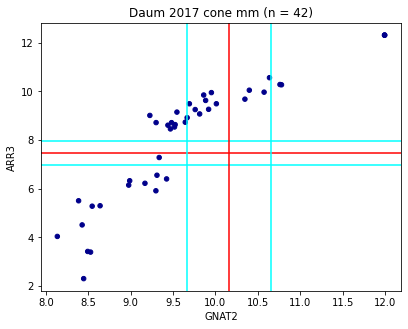

In [470]:
obj = hu.getHegemonPlots("RT39","GNAT2", "ARR3")
hu.plotBooleanPair(obj[0])

## Purified rod and cone datasets

Hartl Dataset

<a id = "func"> </a>

In [843]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT40"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

atype = h.getSurvName("c tissue")
cones = [i for i in h.aRange() if atype[i] == "Cones"]
rods = [i for i in h.aRange() if atype[i] == "Rods"]
PR = [i for i in h.aRange() if atype[i] == "Cones" or atype[i] == "Rods"]
retina = [i for i in h.aRange() if atype[i] != "Cones" and atype[i] != "Rods"]

<a id="specific"></a>

In [737]:
def passDict(res, atype1, atype2, mean_thr):
    boolean_dict = {}
    for i in res:
        expr = h.getExprData(i)
        expr_cones = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in atype1])
        expr_rods = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in atype2])
        boolean_dict[i] = [scipy.stats.ttest_ind(expr_rods, expr_cones, equal_var = False, nan_policy = 'omit'), \
                           (np.nanmean(expr_cones)-np.nanmean(expr_rods))]
    pass_dict = {i:boolean_dict[i] for i in list(boolean_dict.keys()) if boolean_dict[i][0].statistic<0 and \
            boolean_dict[i][0].pvalue/2 < 0.05 and boolean_dict[i][1] > mean_thr}
    print(pass_dict)
    print(len(pass_dict))
    print(len(res))
    print(len(pass_dict)/len(res))
    return(pass_dict)

In [710]:
def allPassDict(res, atype1, atype2, atype3, mean_thr):
    boolean_dict = {}
    for i in res:
        expr = h.getExprData(i)
        expr_cones = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in atype1])
        expr_rods = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in atype2])
        expr_retina = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in atype3])
        boolean_dict[i] = [scipy.stats.ttest_ind(expr_rods, expr_cones, equal_var = False, nan_policy = 'omit'), \
                           scipy.stats.ttest_ind(expr_retina, expr_cones, equal_var = False, nan_policy = 'omit'), \
                           (np.nanmean(expr_cones)-np.nanmean(expr_rods))]
    #print(boolean_dict)
    pass_dict = {i:boolean_dict[i] for i in list(boolean_dict.keys()) \
                 if boolean_dict[i][0].statistic<0 and boolean_dict[i][0].pvalue/2 < 0.05 \
                 and boolean_dict[i][1].statistic<0 and boolean_dict[i][1].pvalue/2 < 0.05 \
                 and boolean_dict[i][2] > mean_thr}
    print(pass_dict)
    print(len(pass_dict))
    print(len(res))
    print(len(pass_dict)/len(res))
    return(pass_dict)

<a id="rods"></a>

### RODS

In [878]:
phillips_NRL_NR2E3_corr = ['ABCA4', 'CNGA1', 'FOXJ1', 'MAK', 'PFKFB2', 'RGS9', 'TTC39C', 'ABCA7',
                      'CNGB1', 'GDF10', 'MSI1', 'PIAS4', 'RHO', 'UBXN11', 'AHI1', 'CNTRL', 
                      'GNAT1', 'MTA2', 'PLEKHB1', 'ROM1', 'UCKL1', 'AIPL1', 'CROCC', 'GNGT1', 
                      'NME7', 'PODXL', 'RP1', 'ANKRD53', 'DEFB119', 'GRK1', 'NOL6', 'PPEF2', 
                      'RTBDN', 'CACNA2D4', 'ELOVL4', 'IMPG2', 'NR2E3', 'PTP4A3', 'SAG', 'CASZ1',
                      'EVL', 'IQGAP2', 'NRL', 'PTPN13', 'SPTBN5', 'CDHR1', 'F13A1', 'JMJD1C', 
                      'PDE6B', 'RBP3', 'SYCE1L', 'CDR2', 'FAM57B', 'LSR', 'PDE6G', 'RDH12',
                      'SYVN1']
phillips_PDE6B_NR2E3_bool = ['ABCA4', 'AIPL1', 'BCO2', 'CABP5', 'CASZ1', 'CLUL1', 'CNGA1', 'CNGB1', 'COBLL1', 'DDC',
                             'DEFB119', 'GNAT1', 'GNGT1', 'GPX3', 'GUCA1A', 'IMPG1', 'LGALSL', 'MCF2L2', 'MPP4',
                             'NR2E3', 'NRL', 'PDC', 'PDE6A', 'PDE6B', 'PDE6G', 'PODXL', 'PPEF2', 'PRPH2', 'RASSF2',
                             'RBP3', 'RGS9', 'RHO', 'ROM1', 'RP1', 'SAG', 'SAMD7', 'SEPT4', 'SLC6A6', 'STEAP2',
                             'TRPM6', 'TTC39C', 'USH2A', 'USP2']
phillips_corr_bool = ['ABCA4', 'AIPL1', 'CASZ1', 'CNGA1', 'CNGB1', 'DEFB119', 'GNAT1', 'GNGT1', 'NR2E3', 'NRL',
                      'PDE6B', 'PDE6G', 'PODXL', 'PPEF2', 'RBP3', 'RGS9', 'RHO', 'ROM1', 'SAG', 'TTC39C']

In [880]:
len(phillips_corr_bool)

20

In [752]:
genes = [h.getName(i).upper() for i in h.getAllIDs()]
res = set(phillips_NRL_NR2E3_corr).intersection(genes)
print(res)
pass_dict = passDict(res, rods, cones, 0.5)
fail_dict = passDict(res, cones, rods, 0.5)

{'PPEF2', 'PDE6G', 'ABCA7', 'NOL6', 'RBP3', 'GNAT1', 'F13A1', 'CDR2', 'ELOVL4', 'ANKRD53', 'FOXJ1', 'TTC39C', 'NRL', 'UBXN11', 'PODXL', 'RGS9', 'AIPL1', 'GDF10', 'RDH12', 'IMPG2', 'CROCC', 'ROM1', 'LSR', 'PIAS4', 'SYCE1L', 'PTPN13', 'UCKL1', 'RP1', 'AHI1', 'JMJD1C', 'RHO', 'EVL', 'GRK1', 'PLEKHB1', 'FAM57B', 'CDHR1', 'SYVN1', 'NR2E3', 'CACNA2D4', 'GNGT1', 'MSI1', 'CNGA1', 'SPTBN5', 'PFKFB2', 'CNTRL', 'CNGB1', 'NME7', 'CASZ1', 'IQGAP2', 'ABCA4', 'PDE6B', 'RTBDN', 'SAG', 'MTA2', 'PTP4A3', 'MAK'}
{'PPEF2': [Ttest_indResult(statistic=-8.304364010615927, pvalue=0.0006744870037155075), 1.2520920880919384], 'PDE6G': [Ttest_indResult(statistic=-13.325839550036871, pvalue=1.5147791182474932e-05), 0.5353360800065996], 'ABCA7': [Ttest_indResult(statistic=-3.752159700466162, pvalue=0.012142788516616184), 0.5640639756670125], 'GNAT1': [Ttest_indResult(statistic=-34.14944662756111, pvalue=1.5336934668224676e-06), 3.5256101277950496], 'CDR2': [Ttest_indResult(statistic=-37.92470498691953, pvalue=6.07

In [753]:
res = set(phillips_PDE6B_NR2E3_bool).intersection(genes)
print(res)
pass_dict = passDict(res, rods, cones, 0.5)
fail_dict = passDict(res, cones, rods, 0.5)

{'PPEF2', 'PDE6G', 'IMPG1', 'COBLL1', 'RBP3', 'GNAT1', 'TTC39C', 'DDC', 'NRL', 'SAMD7', 'LGALSL', 'TRPM6', 'PODXL', 'RGS9', 'AIPL1', 'CABP5', 'PDC', 'MPP4', 'ROM1', 'GUCA1A', 'USP2', 'SEPT4', 'RP1', 'BCO2', 'RHO', 'NR2E3', 'PRPH2', 'GNGT1', 'CNGA1', 'USH2A', 'PDE6A', 'CNGB1', 'STEAP2', 'CASZ1', 'RASSF2', 'ABCA4', 'PDE6B', 'SLC6A6', 'GPX3', 'SAG'}
{'PPEF2': [Ttest_indResult(statistic=-8.304364010615927, pvalue=0.0006744870037155075), 1.2520920880919384], 'PDE6G': [Ttest_indResult(statistic=-13.325839550036871, pvalue=1.5147791182474932e-05), 0.5353360800065996], 'GNAT1': [Ttest_indResult(statistic=-34.14944662756111, pvalue=1.5336934668224676e-06), 3.5256101277950496], 'TTC39C': [Ttest_indResult(statistic=-13.50036131615527, pvalue=5.662787942260071e-05), 1.3430572456366203], 'NRL': [Ttest_indResult(statistic=-58.5035088276976, pvalue=2.0019760540760066e-09), 3.9262786567997336], 'SAMD7': [Ttest_indResult(statistic=-10.862389713157258, pvalue=0.00011233676528501827), 1.5024468590187876]

In [754]:
res = set(phillips_corr_bool).intersection(genes)
print(res)
pass_dict = passDict(res, rods, cones, 0.5)
fail_dict = passDict(res, cones, rods, 0.5)

{'RGS9', 'CASZ1', 'PDE6G', 'NRL', 'RHO', 'AIPL1', 'NR2E3', 'PPEF2', 'RBP3', 'CNGB1', 'GNGT1', 'GNAT1', 'ABCA4', 'CNGA1', 'ROM1', 'PDE6B', 'SAG', 'TTC39C', 'PODXL'}
{'RGS9': [Ttest_indResult(statistic=-7.0538975247929105, pvalue=0.0018387844941790022), 0.6749805586583726], 'CASZ1': [Ttest_indResult(statistic=-10.5004471402534, pvalue=4.738838265559604e-05), 1.2078262180808288], 'PDE6G': [Ttest_indResult(statistic=-13.325839550036871, pvalue=1.5147791182474932e-05), 0.5353360800065996], 'NRL': [Ttest_indResult(statistic=-58.5035088276976, pvalue=2.0019760540760066e-09), 3.9262786567997336], 'RHO': [Ttest_indResult(statistic=-31.794774056243966, pvalue=2.7888670375012265e-06), 3.828852647387574], 'NR2E3': [Ttest_indResult(statistic=-42.53249815859283, pvalue=1.6720211326566707e-07), 4.108530954194613], 'PPEF2': [Ttest_indResult(statistic=-8.304364010615927, pvalue=0.0006744870037155075), 1.2520920880919384], 'CNGB1': [Ttest_indResult(statistic=-53.734391613940716, pvalue=4.474088008493178

In [755]:
res = set(phillips_NRL_NR2E3_corr).difference(phillips_PDE6B_NR2E3_bool)
print(res)
pass_dict = passDict(res, rods, cones, 0.5)
fail_dict = passDict(res, cones, rods, 0.5)

{'ABCA7', 'NOL6', 'F13A1', 'CDR2', 'ELOVL4', 'ANKRD53', 'FOXJ1', 'UBXN11', 'GDF10', 'RDH12', 'IMPG2', 'CROCC', 'LSR', 'PIAS4', 'SYCE1L', 'PTPN13', 'UCKL1', 'AHI1', 'JMJD1C', 'GRK1', 'PLEKHB1', 'EVL', 'CDHR1', 'SPTBN5', 'FAM57B', 'MSI1', 'CACNA2D4', 'SYVN1', 'PFKFB2', 'CNTRL', 'NME7', 'IQGAP2', 'RTBDN', 'MTA2', 'PTP4A3', 'MAK'}
{'ABCA7': [Ttest_indResult(statistic=-3.752159700466162, pvalue=0.012142788516616184), 0.5640639756670125], 'CDR2': [Ttest_indResult(statistic=-37.92470498691953, pvalue=6.078249279245654e-07), 2.62218009152266], 'ELOVL4': [Ttest_indResult(statistic=-16.161660602972187, pvalue=4.4788854456219645e-06), 1.7526517242350268], 'UBXN11': [Ttest_indResult(statistic=-8.146759224469944, pvalue=0.00021149474398097056), 1.0263945722985426], 'RDH12': [Ttest_indResult(statistic=-16.51120454530381, pvalue=3.2327547834105033e-06), 1.7671619768873725], 'CROCC': [Ttest_indResult(statistic=-9.236939708421277, pvalue=9.38370652828658e-05), 0.695241392633708], 'GRK1': [Ttest_indResu

In [767]:
statsmodels.stats.proportion.proportions_ztest([42,19],[56,19])

(-2.416643112755011, 0.01566436712307298)

### RODS II (PR Specificity)

In [758]:
genes = [h.getName(i).upper() for i in h.getAllIDs()]
res = set(phillips_NRL_NR2E3_corr).intersection(genes)
print(res)
pass_dict = passDict(res, PR, retina, 0.5)
fail_dict = passDict(res, retina, PR, 0.5)

{'PPEF2', 'PDE6G', 'ABCA7', 'NOL6', 'RBP3', 'GNAT1', 'F13A1', 'CDR2', 'ELOVL4', 'ANKRD53', 'FOXJ1', 'TTC39C', 'NRL', 'UBXN11', 'PODXL', 'RGS9', 'AIPL1', 'GDF10', 'RDH12', 'IMPG2', 'CROCC', 'ROM1', 'LSR', 'PIAS4', 'SYCE1L', 'PTPN13', 'UCKL1', 'RP1', 'AHI1', 'JMJD1C', 'RHO', 'EVL', 'GRK1', 'PLEKHB1', 'FAM57B', 'CDHR1', 'SYVN1', 'NR2E3', 'CACNA2D4', 'GNGT1', 'MSI1', 'CNGA1', 'SPTBN5', 'PFKFB2', 'CNTRL', 'CNGB1', 'NME7', 'CASZ1', 'IQGAP2', 'ABCA4', 'PDE6B', 'RTBDN', 'SAG', 'MTA2', 'PTP4A3', 'MAK'}
{'PPEF2': [Ttest_indResult(statistic=-19.80171111651426, pvalue=2.116929127310893e-09), 5.4666623144840765], 'PDE6G': [Ttest_indResult(statistic=-42.04946770727278, pvalue=6.987248429471639e-14), 6.2939621259401735], 'RBP3': [Ttest_indResult(statistic=-11.7093740856645, pvalue=1.6446378870071e-07), 5.8928559723044796], 'GNAT1': [Ttest_indResult(statistic=-7.097291716288896, pvalue=0.0001713444797060945), 4.772683982199581], 'CDR2': [Ttest_indResult(statistic=-6.574455759804528, pvalue=9.742434705

In [759]:
res = set(phillips_PDE6B_NR2E3_bool).intersection(genes)
print(res)
pass_dict = passDict(res, PR, retina, 0.5)
fail_dict = passDict(res, retina, PR, 0.5)

{'PPEF2', 'PDE6G', 'IMPG1', 'COBLL1', 'RBP3', 'GNAT1', 'TTC39C', 'DDC', 'NRL', 'SAMD7', 'LGALSL', 'TRPM6', 'PODXL', 'RGS9', 'AIPL1', 'CABP5', 'PDC', 'MPP4', 'ROM1', 'GUCA1A', 'USP2', 'SEPT4', 'RP1', 'BCO2', 'RHO', 'NR2E3', 'PRPH2', 'GNGT1', 'CNGA1', 'USH2A', 'PDE6A', 'CNGB1', 'STEAP2', 'CASZ1', 'RASSF2', 'ABCA4', 'PDE6B', 'SLC6A6', 'GPX3', 'SAG'}
{'PPEF2': [Ttest_indResult(statistic=-19.80171111651426, pvalue=2.116929127310893e-09), 5.4666623144840765], 'PDE6G': [Ttest_indResult(statistic=-42.04946770727278, pvalue=6.987248429471639e-14), 6.2939621259401735], 'IMPG1': [Ttest_indResult(statistic=-44.563620630593825, pvalue=2.7455454904175635e-09), 5.885722362940685], 'RBP3': [Ttest_indResult(statistic=-11.7093740856645, pvalue=1.6446378870071e-07), 5.8928559723044796], 'GNAT1': [Ttest_indResult(statistic=-7.097291716288896, pvalue=0.0001713444797060945), 4.772683982199581], 'TTC39C': [Ttest_indResult(statistic=-4.503590892426496, pvalue=0.0014800277732556371), 2.124974067800408], 'DDC':

In [760]:
res = set(phillips_corr_bool).intersection(genes)
print(res)
pass_dict = passDict(res, PR, retina, 0.5)
fail_dict = passDict(res, retina, PR, 0.5)

{'RGS9', 'CASZ1', 'PDE6G', 'NRL', 'RHO', 'AIPL1', 'NR2E3', 'PPEF2', 'RBP3', 'CNGB1', 'GNGT1', 'GNAT1', 'ABCA4', 'CNGA1', 'ROM1', 'PDE6B', 'SAG', 'TTC39C', 'PODXL'}
{'RGS9': [Ttest_indResult(statistic=-32.063948925370774, pvalue=1.853183695889624e-12), 5.154890704089469], 'CASZ1': [Ttest_indResult(statistic=-13.959857999526216, pvalue=5.786971973518243e-08), 5.347991234431431], 'PDE6G': [Ttest_indResult(statistic=-42.04946770727278, pvalue=6.987248429471639e-14), 6.2939621259401735], 'NRL': [Ttest_indResult(statistic=-7.356897511165165, pvalue=0.00014338177124744995), 5.485448833220783], 'RHO': [Ttest_indResult(statistic=-7.06149442874907, pvalue=0.0001572429260480441), 5.1923540056575685], 'AIPL1': [Ttest_indResult(statistic=-28.889141764705176, pvalue=4.997376738383297e-09), 6.848232343714129], 'NR2E3': [Ttest_indResult(statistic=-6.927002698231323, pvalue=0.00018335322630775458), 5.449689670765347], 'PPEF2': [Ttest_indResult(statistic=-19.80171111651426, pvalue=2.116929127310893e-09)

In [761]:
res = set(phillips_NRL_NR2E3_corr).difference(phillips_PDE6B_NR2E3_bool)
print(res)
pass_dict = passDict(res, PR, retina, 0.5)
fail_dict = passDict(res, retina, PR, 0.5)

{'ABCA7', 'NOL6', 'F13A1', 'CDR2', 'ELOVL4', 'ANKRD53', 'FOXJ1', 'UBXN11', 'GDF10', 'RDH12', 'IMPG2', 'CROCC', 'LSR', 'PIAS4', 'SYCE1L', 'PTPN13', 'UCKL1', 'AHI1', 'JMJD1C', 'GRK1', 'PLEKHB1', 'EVL', 'CDHR1', 'SPTBN5', 'FAM57B', 'MSI1', 'CACNA2D4', 'SYVN1', 'PFKFB2', 'CNTRL', 'NME7', 'IQGAP2', 'RTBDN', 'MTA2', 'PTP4A3', 'MAK'}
{'CDR2': [Ttest_indResult(statistic=-6.574455759804528, pvalue=9.742434705367846e-05), 3.5164768415594176], 'ELOVL4': [Ttest_indResult(statistic=-8.007519264278459, pvalue=7.345361112965928e-05), 2.7090150939544193], 'UBXN11': [Ttest_indResult(statistic=-14.167197443652983, pvalue=1.3234114338714042e-08), 3.4471225686212503], 'RDH12': [Ttest_indResult(statistic=-15.583775899369561, pvalue=5.4879055745650494e-08), 5.713841479279983], 'IMPG2': [Ttest_indResult(statistic=-67.49445656374017, pvalue=1.391744000121846e-11), 5.3649675810095925], 'CROCC': [Ttest_indResult(statistic=-13.34304612319693, pvalue=7.066588521763643e-08), 2.903358791363484], 'LSR': [Ttest_indRe

### CONES

In [673]:
genes = [h.getName(i).upper() for i in h.getAllIDs()]
diffExprHartl = allPassDict(genes, cones, rods, retina, 2)

447
52143
0.008572579253207525


Cone specificity of genes from boolean analysis with Arr3, Gnat2 as bait genes

In [840]:
genes = [h.getName(i).upper() for i in h.getAllIDs()]
res = set(Arr3_Gnat2_bool_phillips).intersection(genes)
print(res)

boolean_dict = passDict(res, cones, rods, 0.5)

{'MLXIP', 'SVOP', 'XRCC4', 'RXRG', 'ANKRD33B', 'WWC1', 'EGFLAM', 'HEG1', 'MAOA', 'SLC24A2', 'GNAT2', 'NDNF', 'PEX5L', 'FGF12', 'STXBP5L', 'CERKL', 'SH3GL2', 'RS1', 'PDZD2', 'ARR3', 'HCN1', 'MAGEE1', 'RD3', 'SEMA3C', 'SLC1A7', 'GNGT2', 'TRIM59', 'GPR180', 'FMN1', 'UBAP1L'}
{'MLXIP': [Ttest_indResult(statistic=-3.8982929122213, pvalue=0.01706688009439764), 1.3851056035643419], 'XRCC4': [Ttest_indResult(statistic=-7.491495961908139, pvalue=0.0005810148867064625), 0.5479124386796546], 'RXRG': [Ttest_indResult(statistic=-57.350253599298426, pvalue=5.471334090213618e-06), 5.906216589869375], 'WWC1': [Ttest_indResult(statistic=-28.09483050581673, pvalue=8.401811062674056e-07), 4.9009217042311395], 'MAOA': [Ttest_indResult(statistic=-4.550848155222173, pvalue=0.015041251167240104), 0.6509233375290729], 'SLC24A2': [Ttest_indResult(statistic=-73.34902619358567, pvalue=4.744689432374918e-08), 4.943653165670813], 'GNAT2': [Ttest_indResult(statistic=-42.17945828800873, pvalue=1.097856409312427e-05)

Genes which are more highly expressed in rods from boolean analysis

In [729]:
fail_dict = passDict(Arr3_Gnat2_bool_phillips_2, rods, cones, 0.5)

{'MLXIP': [Ttest_indResult(statistic=3.8982929122213, pvalue=0.01706688009439764), -1.3851056035643419], 'SVOP': [Ttest_indResult(statistic=3.215218121449738, pvalue=0.031009653867663894), -0.370793921111785], 'XRCC4': [Ttest_indResult(statistic=7.491495961908139, pvalue=0.0005810148867064625), -0.5479124386796546], 'RXRG': [Ttest_indResult(statistic=57.350253599298426, pvalue=5.471334090213618e-06), -5.906216589869375], 'ANKRD33B': [Ttest_indResult(statistic=-14.190954763899189, pvalue=9.958984278627234e-05), 1.0464617465987294], 'WWC1': [Ttest_indResult(statistic=28.09483050581673, pvalue=8.401811062674056e-07), -4.9009217042311395], 'EGFLAM': [Ttest_indResult(statistic=5.703764465021439, pvalue=0.003514049417081789), -0.4885435293081395], 'HEG1': [Ttest_indResult(statistic=-1.544984147560787, pvalue=0.17426773964022024), 0.18067900926427782], 'MAOA': [Ttest_indResult(statistic=4.550848155222173, pvalue=0.015041251167240104), -0.6509233375290729], 'SLC24A2': [Ttest_indResult(statisti

Cone specific genes in correlational analysis

In [849]:
Crx_Prdm1_Rxrg_Thrb_corr_phillips_2 = set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).intersection(genes)
print(Crx_Prdm1_Rxrg_Thrb_corr_phillips_2)

pass_dict = passDict(Crx_Prdm1_Rxrg_Thrb_corr_phillips_2, cones, rods, 0.5)

{'RBP3', 'XRCC4', 'RXRG', 'SYT1', 'DCT', 'CRX', 'AIPL1', 'CHRNA3', 'CADM2', 'SLC38A5', 'CERKL', 'FRMPD1', 'FAM57B', 'GABRR2', 'CPLX4', 'NEUROD1', 'TPD52', 'PRICKLE2', 'RD3', 'RAPGEF4', 'GNGT2', 'COBLL1', 'SNAP25', 'ANKRD33B', 'TTC39C', 'LGALSL', 'STX3', 'PDC', 'SYP', 'PEX5L', 'GUCA1A', 'MEGF9', 'LBH', 'CDHR1', 'ISOC1', 'CHRNA5', 'RS1', 'RALGPS2', 'GALNT13', 'SEMA3C', 'PRDM1', 'NCKAP5', 'FMN1', 'MAK', 'IMPG1', 'PCBP4', 'SGIP1', 'LPCAT1', 'TUBA4A', 'MPP4', 'GNAT2', 'ENO2', 'STXBP5L', 'KCNV2', 'UNC119', 'RP1', 'EML1', 'AKAP9', 'PLEKHB1', 'CPE', 'ARL6', 'ROBO2', 'USH2A', 'VTN', 'PDE6H', 'RPGRIP1', 'SLC1A7', 'TRIM36', 'DST', 'NPTX1', 'THRB', 'FSTL5', 'PROM1', 'CADPS', 'EGFLAM', 'SLC17A7', 'MAOA', 'GNB3', 'GPC5', 'CACNB2', 'IMPG2', 'FGF12', 'SLC40A1', 'SEPT4', 'ARMC9', 'RCVRN', 'OTX2', 'SH3GL2', 'DLG4', 'TRAK2', 'SCN3B', 'ARR3', 'SLC6A6', 'NEUROD4'}
{'RBP3': [Ttest_indResult(statistic=-15.622597254588522, pvalue=1.443245061974586e-05), 1.7173672282527477], 'XRCC4': [Ttest_indResult(statistic

Genes more highly expressed in rods from correlational analysis

In [850]:
fail_dict = passDict(Crx_Prdm1_Rxrg_Thrb_corr_phillips_2, rods, cones, 0.5)

{'CADM2': [Ttest_indResult(statistic=-6.968429891339901, pvalue=0.000678338286566823), 0.8884878897159547], 'FRMPD1': [Ttest_indResult(statistic=-56.25196580578151, pvalue=5.878451864541516e-09), 3.1251732490959574], 'FAM57B': [Ttest_indResult(statistic=-7.939852045361571, pvalue=0.00028813350939141326), 0.8818153797250252], 'CPLX4': [Ttest_indResult(statistic=-13.798180137259983, pvalue=1.0073499347402757e-05), 1.0089312533812116], 'NEUROD1': [Ttest_indResult(statistic=-8.781772572292047, pvalue=0.00013869554814748458), 0.5844924864368473], 'TPD52': [Ttest_indResult(statistic=-17.33752902338174, pvalue=5.1065387875993244e-06), 1.1605966593801824], 'ANKRD33B': [Ttest_indResult(statistic=-14.190954763899189, pvalue=9.958984278627234e-05), 1.0464617465987294], 'TTC39C': [Ttest_indResult(statistic=-13.50036131615527, pvalue=5.662787942260071e-05), 1.3430572456366203], 'PDC': [Ttest_indResult(statistic=-17.362590347676406, pvalue=1.6418627014504507e-05), 1.8696207377343512], 'PEX5L': [Ttes

In [851]:
fail_dict['AKAP9']

[Ttest_indResult(statistic=-6.177295944137127, pvalue=0.0012611039436004963),
 0.580221100108715]

In [689]:
#Boolean vs. boolean and not corr
statsmodels.stats.proportion.proportions_ztest([15,32],[30,94])

(1.5685721890038447, 0.11674765692145313)

In [692]:
statsmodels.stats.proportion.proportions_ztest([4,26],[30,94])

(-1.5953026968676092, 0.11064456283060886)

Correlation and not boolean - to check if enriched in non-cone-specific genes

In [734]:
lst = set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).difference(Arr3_Gnat2_bool_phillips)
res = set(lst).intersection(genes)
pass_dict = passDict(res, cones, rods, 0.5)

{'IMPG1': [Ttest_indResult(statistic=3.6206367031612516, pvalue=0.011155411323878064), -0.2062273362835132], 'COBLL1': [Ttest_indResult(statistic=-0.2349718234924151, pvalue=0.8226440846895726), 0.029104132541772243], 'RBP3': [Ttest_indResult(statistic=-15.622597254588522, pvalue=1.443245061974586e-05), 1.7173672282527477], 'THRB': [Ttest_indResult(statistic=-9.12567354861832, pvalue=0.00010584116840363432), 0.8737703600108961], 'SNAP25': [Ttest_indResult(statistic=-9.192205951649898, pvalue=0.0012090310795085785), 0.6370167201658745], 'FSTL5': [Ttest_indResult(statistic=-3.9379632914248717, pvalue=0.016987683126720755), 1.063858412777639], 'SYT1': [Ttest_indResult(statistic=-7.2574800985571954, pvalue=0.0010648434703421589), 0.45990487732463947], 'DCT': [Ttest_indResult(statistic=-0.09572070076497956, pvalue=0.9268716082390189), 0.03418335689016505], 'PROM1': [Ttest_indResult(statistic=13.133971984596794, pvalue=0.00017129605793174432), -0.9832081010118738], 'PCBP4': [Ttest_indResult(

In [735]:
fail_dict = passDict(res, rods, cones, 0.5)

{'IMPG1': [Ttest_indResult(statistic=-3.6206367031612516, pvalue=0.011155411323878064), 0.2062273362835132], 'COBLL1': [Ttest_indResult(statistic=0.2349718234924151, pvalue=0.8226440846895726), -0.029104132541772243], 'RBP3': [Ttest_indResult(statistic=15.622597254588522, pvalue=1.443245061974586e-05), -1.7173672282527477], 'THRB': [Ttest_indResult(statistic=9.12567354861832, pvalue=0.00010584116840363432), -0.8737703600108961], 'SNAP25': [Ttest_indResult(statistic=9.192205951649898, pvalue=0.0012090310795085785), -0.6370167201658745], 'FSTL5': [Ttest_indResult(statistic=3.9379632914248717, pvalue=0.016987683126720755), -1.063858412777639], 'SYT1': [Ttest_indResult(statistic=7.2574800985571954, pvalue=0.0010648434703421589), -0.45990487732463947], 'DCT': [Ttest_indResult(statistic=0.09572070076497956, pvalue=0.9268716082390189), -0.03418335689016505], 'PROM1': [Ttest_indResult(statistic=-13.133971984596794, pvalue=0.00017129605793174432), 0.9832081010118738], 'PCBP4': [Ttest_indResult(

### CONES 2

In [835]:
genes = [h.getName(i).upper() for i in h.getAllIDs()]
res = set(Arr3_Gnat2_bool_phillips).intersection(genes)
print(res)
pass_dict = passDict(res, PR, retina, 0.5)
fail_dict = passDict(res, retina, PR, 0.5)

{'MLXIP', 'SVOP', 'XRCC4', 'RXRG', 'ANKRD33B', 'WWC1', 'EGFLAM', 'HEG1', 'MAOA', 'SLC24A2', 'GNAT2', 'NDNF', 'PEX5L', 'FGF12', 'STXBP5L', 'CERKL', 'SH3GL2', 'RS1', 'PDZD2', 'ARR3', 'HCN1', 'MAGEE1', 'RD3', 'SEMA3C', 'SLC1A7', 'GNGT2', 'TRIM59', 'GPR180', 'FMN1', 'UBAP1L'}
{'ANKRD33B': [Ttest_indResult(statistic=-17.932411910631714, pvalue=9.187963423701883e-10), 5.1916975362199915], 'WWC1': [Ttest_indResult(statistic=-2.598325535432228, pvalue=0.032949710350929085), 2.470817741331985], 'EGFLAM': [Ttest_indResult(statistic=-8.235466278168563, pvalue=0.0002778930153636099), 3.9249761938916357], 'HEG1': [Ttest_indResult(statistic=-13.298010896649712, pvalue=2.5539171514775493e-05), 4.469021211066893], 'GNAT2': [Ttest_indResult(statistic=-2.8601299186857805, pvalue=0.0217319264592907), 4.23806542191398], 'PEX5L': [Ttest_indResult(statistic=-11.26666165887761, pvalue=8.934434338599462e-07), 5.331797738722392], 'CERKL': [Ttest_indResult(statistic=-18.144301522132626, pvalue=1.854622462022187

In [844]:
res = set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).intersection(genes)
print(res)
pass_dict = passDict(res, PR, retina, 0.5)
fail_dict = passDict(res, retina, PR, 0.5)

{'RBP3', 'XRCC4', 'RXRG', 'SYT1', 'DCT', 'CRX', 'AIPL1', 'CHRNA3', 'CADM2', 'SLC38A5', 'CERKL', 'FRMPD1', 'FAM57B', 'GABRR2', 'CPLX4', 'NEUROD1', 'TPD52', 'PRICKLE2', 'RD3', 'RAPGEF4', 'GNGT2', 'COBLL1', 'SNAP25', 'ANKRD33B', 'TTC39C', 'LGALSL', 'STX3', 'PDC', 'SYP', 'PEX5L', 'GUCA1A', 'MEGF9', 'LBH', 'CDHR1', 'ISOC1', 'CHRNA5', 'RS1', 'RALGPS2', 'GALNT13', 'SEMA3C', 'PRDM1', 'NCKAP5', 'FMN1', 'MAK', 'IMPG1', 'PCBP4', 'SGIP1', 'LPCAT1', 'TUBA4A', 'MPP4', 'GNAT2', 'ENO2', 'STXBP5L', 'KCNV2', 'UNC119', 'RP1', 'EML1', 'AKAP9', 'PLEKHB1', 'CPE', 'ARL6', 'ROBO2', 'USH2A', 'VTN', 'PDE6H', 'RPGRIP1', 'SLC1A7', 'TRIM36', 'DST', 'NPTX1', 'THRB', 'FSTL5', 'PROM1', 'CADPS', 'EGFLAM', 'SLC17A7', 'MAOA', 'GNB3', 'GPC5', 'CACNB2', 'IMPG2', 'FGF12', 'SLC40A1', 'SEPT4', 'ARMC9', 'RCVRN', 'OTX2', 'SH3GL2', 'DLG4', 'TRAK2', 'SCN3B', 'ARR3', 'SLC6A6', 'NEUROD4'}
{'RBP3': [Ttest_indResult(statistic=-11.7093740856645, pvalue=1.6446378870071e-07), 5.8928559723044796], 'DCT': [Ttest_indResult(statistic=-3.94

In [764]:
res = set(Arr3_Gnat2_bool_phillips).intersection(Crx_Prdm1_Rxrg_Thrb_corr_phillips).intersection(genes)
print(res)
pass_dict = passDict(res, PR, retina, 0.5)
fail_dict = passDict(res, retina, PR, 0.5)

{'CERKL', 'MAOA', 'ARR3', 'RD3', 'SEMA3C', 'XRCC4', 'SLC1A7', 'RXRG', 'GNGT2', 'GNAT2', 'SH3GL2', 'ANKRD33B', 'PEX5L', 'RS1', 'FGF12', 'STXBP5L', 'EGFLAM', 'FMN1'}
{'CERKL': [Ttest_indResult(statistic=-18.144301522132626, pvalue=1.8546224620221878e-06), 3.9460700337050887], 'ARR3': [Ttest_indResult(statistic=-3.138245633038433, pvalue=0.014110409979158857), 4.810994986470184], 'RD3': [Ttest_indResult(statistic=-18.84446173464181, pvalue=4.8541608886850595e-06), 5.4876494423943445], 'SLC1A7': [Ttest_indResult(statistic=-13.38490152346915, pvalue=1.8082392831750408e-06), 4.929209167193317], 'GNGT2': [Ttest_indResult(statistic=-3.177712645536476, pvalue=0.012916234079162807), 4.710567690364167], 'GNAT2': [Ttest_indResult(statistic=-2.8601299186857805, pvalue=0.0217319264592907), 4.23806542191398], 'ANKRD33B': [Ttest_indResult(statistic=-17.932411910631714, pvalue=9.187963423701883e-10), 5.1916975362199915], 'PEX5L': [Ttest_indResult(statistic=-11.26666165887761, pvalue=8.934434338599462e-

In [766]:
res = set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).difference(Arr3_Gnat2_bool_phillips).intersection(genes)
print(res)
pass_dict = passDict(res, PR, retina, 0.5)
fail_dict = passDict(res, retina, PR, 0.5)

{'IMPG1', 'COBLL1', 'RBP3', 'THRB', 'SNAP25', 'FSTL5', 'SYT1', 'DCT', 'PROM1', 'PCBP4', 'SGIP1', 'CADPS', 'TTC39C', 'LGALSL', 'LPCAT1', 'CRX', 'SLC17A7', 'TUBA4A', 'AIPL1', 'GNB3', 'GPC5', 'STX3', 'CACNB2', 'PDC', 'MPP4', 'IMPG2', 'CHRNA3', 'SYP', 'GUCA1A', 'ENO2', 'SLC40A1', 'KCNV2', 'CADM2', 'MEGF9', 'SLC38A5', 'SEPT4', 'EML1', 'UNC119', 'FRMPD1', 'AKAP9', 'RP1', 'LBH', 'PLEKHB1', 'ARL6', 'CDHR1', 'FAM57B', 'CPE', 'GABRR2', 'OTX2', 'MAK', 'ARMC9', 'ROBO2', 'USH2A', 'DLG4', 'RCVRN', 'ISOC1', 'CPLX4', 'VTN', 'NEUROD1', 'CHRNA5', 'PDE6H', 'RPGRIP1', 'TRAK2', 'SCN3B', 'RALGPS2', 'PRICKLE2', 'GALNT13', 'TPD52', 'PRDM1', 'RAPGEF4', 'NCKAP5', 'TRIM36', 'SLC6A6', 'DST', 'NPTX1', 'NEUROD4'}
{'IMPG1': [Ttest_indResult(statistic=-44.563620630593825, pvalue=2.7455454904175635e-09), 5.885722362940685], 'RBP3': [Ttest_indResult(statistic=-11.7093740856645, pvalue=1.6446378870071e-07), 5.8928559723044796], 'THRB': [Ttest_indResult(statistic=-7.4818998465272575, pvalue=9.374588122912914e-05), 2.8166

### Sarin Dataset

In [852]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT41"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

atype = h.getSurvName("c cell type")
cones = [i for i in h.aRange() if atype[i] == "Cones"]
rods = [i for i in h.aRange() if atype[i] == "Rods"]
PR = [i for i in h.aRange() if atype[i] == "Cones" or atype[i] == "Rods"]
retina = [i for i in h.aRange() if atype[i] != "Cones" and atype[i] != "Rods"]

In [676]:
genes = [h.getName(i).upper() for i in h.getAllIDs()]
diffExprSarin = allPassDict(genes, cones, rods, retina, 2)

482
13812
0.034897190848537506


In [682]:
diffExprCones = set(diffExprHartl).intersection(diffExprSarin)
print(sorted(diffExprCones))

['2310030G06RIK', '4930447C04RIK', '4930554H23RIK', '4933415A04RIK', '5930412G12RIK', '8030423F21RIK', 'A730017C20RIK', 'A930009A15RIK', 'A930033H14RIK', 'A930038B10RIK', 'ABCB1B', 'ABCB4', 'ACBD6', 'ADRB1', 'AGA', 'AGR2', 'AHCYL2', 'AI839979', 'ALK', 'AMPD2', 'ANKRD31', 'ARHGDIB', 'ARR3', 'ASIC4', 'BACH2', 'BEND5', 'BMP15', 'C230014O12RIK', 'CALU', 'CAMK2B', 'CASP7', 'CCDC136', 'CCDC155', 'CCKBR', 'CCL9', 'CCNJL', 'CD37', 'CD59A', 'CDH18', 'CDK6', 'CDKL1', 'CEP170B', 'CHRNB4', 'CIT', 'CLCA1', 'CLTB', 'CLU', 'CNGA3', 'CNGB3', 'COX6B2', 'CROT', 'CRYBG3', 'CYB561', 'D430019H16RIK', 'DLL1', 'DOLPP1', 'DSCAM', 'ECE1', 'EIF3B', 'ELK3', 'ELOVL5', 'ELOVL6', 'ELOVL7', 'EPB41L1', 'EPHA10', 'ERICH6', 'ESPL1', 'EYA1', 'FAM19A3', 'FAM92B', 'FBXW21', 'FFAR4', 'FGF5', 'FLT4', 'FRMD6', 'FRRS1', 'FZD10', 'GABRG3', 'GALNT13', 'GCKR', 'GM10803', 'GM11527', 'GM15348', 'GM38399', 'GM4792', 'GM9869', 'GNAT2', 'GNB3', 'GNGT2', 'GRAMD3', 'GSG1L2', 'GSTT2', 'GULO', 'GZMM', 'H2-M5', 'H2-Q2', 'H2-Q6', 'HARBI1',

In [585]:
genes = [h.getName(i).upper() for i in h.getAllIDs()]
Arr3_Gnat2_bool_phillips_2 = set(Arr3_Gnat2_bool_phillips).intersection(genes)
print(Arr3_Gnat2_bool_phillips_2)
boolean_dict = {}
for i in Arr3_Gnat2_bool_phillips_2:
    expr = h.getExprData(i)
    expr_cones = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in cones])
    expr_rods = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in rods])
    boolean_dict[i] = scipy.stats.ttest_ind(expr_rods, expr_cones, equal_var = False, nan_policy = 'omit')
print(boolean_dict)
pass_dict = {i:boolean_dict[i].pvalue for i in list(boolean_dict.keys()) if boolean_dict[i].statistic<0 and \
            boolean_dict[i].pvalue/2 < 0.05}
print(pass_dict)
print(len(pass_dict))
print(len(Arr3_Gnat2_bool_phillips_2))
len(pass_dict)/len(Arr3_Gnat2_bool_phillips_2)

{'MLXIP', 'SVOP', 'XRCC4', 'RXRG', 'ANKRD33B', 'WWC1', 'EGFLAM', 'HEG1', 'MAOA', 'GNAT2', 'SLC24A2', 'NDNF', 'PEX5L', 'FGF12', 'STXBP5L', 'CERKL', 'SH3GL2', 'RS1', 'PDZD2', 'ARR3', 'MAGEE1', 'HCN1', 'RD3', 'SEMA3C', 'SLC1A7', 'GNGT2', 'TRIM59', 'GPR180', 'FMN1', 'UBAP1L'}
{'MLXIP': Ttest_indResult(statistic=-1.6423863548307722, pvalue=0.14099327226404154), 'SVOP': Ttest_indResult(statistic=-1.368025577457991, pvalue=0.20253646641415488), 'XRCC4': Ttest_indResult(statistic=-0.19019115863899944, pvalue=0.8532126640453123), 'RXRG': Ttest_indResult(statistic=-3.5863218611128493, pvalue=0.015672630362455604), 'ANKRD33B': Ttest_indResult(statistic=8.76109329224993, pvalue=5.280201479660201e-06), 'WWC1': Ttest_indResult(statistic=-5.326711059799023, pvalue=0.002763868776259556), 'EGFLAM': Ttest_indResult(statistic=1.5904502908893354, pvalue=0.151485832834848), 'HEG1': Ttest_indResult(statistic=-2.8317317793086825, pvalue=0.020179144084782073), 'MAOA': Ttest_indResult(statistic=-0.320414633084

0.4666666666666667

In [853]:
Crx_Prdm1_Rxrg_Thrb_corr_phillips_2 = set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).intersection(genes)
print(Crx_Prdm1_Rxrg_Thrb_corr_phillips_2)
boolean_dict = {}
for i in Crx_Prdm1_Rxrg_Thrb_corr_phillips_2:
    expr = h.getExprData(i)
    expr_cones = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in cones])
    expr_rods = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in rods])
    boolean_dict[i] = scipy.stats.ttest_ind(expr_rods, expr_cones, equal_var = False, nan_policy = 'omit')
print(boolean_dict)
pass_dict = {i:boolean_dict[i].pvalue for i in list(boolean_dict.keys()) if boolean_dict[i].statistic<0 and \
            boolean_dict[i].pvalue/2 < 0.05}
print(pass_dict)
print(len(pass_dict))
print(len(Crx_Prdm1_Rxrg_Thrb_corr_phillips_2))
len(pass_dict)/len(Crx_Prdm1_Rxrg_Thrb_corr_phillips_2)

{'RBP3', 'XRCC4', 'RXRG', 'SYT1', 'DCT', 'CRX', 'AIPL1', 'CHRNA3', 'CADM2', 'SLC38A5', 'CERKL', 'FRMPD1', 'FAM57B', 'GABRR2', 'CPLX4', 'NEUROD1', 'TPD52', 'PRICKLE2', 'RD3', 'RAPGEF4', 'GNGT2', 'COBLL1', 'SNAP25', 'ANKRD33B', 'TTC39C', 'LGALSL', 'STX3', 'PDC', 'SYP', 'PEX5L', 'GUCA1A', 'MEGF9', 'LBH', 'CDHR1', 'ISOC1', 'CHRNA5', 'RS1', 'RALGPS2', 'GALNT13', 'SEMA3C', 'PRDM1', 'NCKAP5', 'FMN1', 'MAK', 'IMPG1', 'PCBP4', 'SGIP1', 'LPCAT1', 'TUBA4A', 'MPP4', 'GNAT2', 'ENO2', 'STXBP5L', 'KCNV2', 'UNC119', 'RP1', 'EML1', 'AKAP9', 'PLEKHB1', 'CPE', 'ARL6', 'ROBO2', 'USH2A', 'VTN', 'PDE6H', 'RPGRIP1', 'SLC1A7', 'TRIM36', 'DST', 'NPTX1', 'THRB', 'FSTL5', 'PROM1', 'CADPS', 'EGFLAM', 'SLC17A7', 'MAOA', 'GNB3', 'GPC5', 'CACNB2', 'IMPG2', 'FGF12', 'SLC40A1', 'SEPT4', 'ARMC9', 'RCVRN', 'OTX2', 'SH3GL2', 'DLG4', 'TRAK2', 'SCN3B', 'ARR3', 'SLC6A6', 'NEUROD4'}
{'RBP3': Ttest_indResult(statistic=-4.218602556885181, pvalue=0.0044872228805220415), 'XRCC4': Ttest_indResult(statistic=-0.19019115863899944, p

0.3723404255319149

In [854]:
boolean_dict["AKAP9"]

Ttest_indResult(statistic=1.762580378830128, pvalue=0.10989697282170069)

In [531]:
pass_dict['GUCA1A']

0.04657804426319235

In [532]:
statsmodels.stats.proportion.proportions_ztest([14,35],[30,94])

(0.9201089461652024, 0.35751582980085317)

In [521]:
lst = set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).difference(Arr3_Gnat2_bool_phillips)
res = set(lst).intersection(genes)
print(res)
boolean_dict = {}
for i in res:
    expr = h.getExprData(i)
    expr_cones = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in cones])
    expr_rods = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in rods])
    boolean_dict[i] = scipy.stats.ttest_ind(expr_rods, expr_cones, equal_var = False, nan_policy = 'omit')
print(boolean_dict)
pass_dict = {i:boolean_dict[i].pvalue for i in list(boolean_dict.keys()) if boolean_dict[i].statistic<0 and \
            boolean_dict[i].pvalue/2 < 0.05}
print(pass_dict)
print(len(pass_dict))
print(len(res))
len(pass_dict)/len(res)

{'IMPG1', 'COBLL1', 'RBP3', 'THRB', 'SNAP25', 'FSTL5', 'SYT1', 'DCT', 'PROM1', 'PCBP4', 'SGIP1', 'CADPS', 'TTC39C', 'LGALSL', 'LPCAT1', 'CRX', 'SLC17A7', 'TUBA4A', 'AIPL1', 'GNB3', 'GPC5', 'STX3', 'CACNB2', 'PDC', 'MPP4', 'IMPG2', 'CHRNA3', 'SYP', 'GUCA1A', 'ENO2', 'SLC40A1', 'KCNV2', 'CADM2', 'MEGF9', 'SLC38A5', 'SEPT4', 'EML1', 'UNC119', 'FRMPD1', 'AKAP9', 'RP1', 'LBH', 'PLEKHB1', 'ARL6', 'CDHR1', 'FAM57B', 'CPE', 'GABRR2', 'OTX2', 'MAK', 'ARMC9', 'ROBO2', 'USH2A', 'DLG4', 'RCVRN', 'ISOC1', 'CPLX4', 'VTN', 'NEUROD1', 'CHRNA5', 'PDE6H', 'RPGRIP1', 'TRAK2', 'SCN3B', 'RALGPS2', 'PRICKLE2', 'GALNT13', 'TPD52', 'PRDM1', 'RAPGEF4', 'NCKAP5', 'TRIM36', 'SLC6A6', 'DST', 'NPTX1', 'NEUROD4'}
{'IMPG1': Ttest_indResult(statistic=3.6206367031612516, pvalue=0.011155411323878064), 'COBLL1': Ttest_indResult(statistic=-0.2349718234924151, pvalue=0.8226440846895726), 'RBP3': Ttest_indResult(statistic=-15.622597254588522, pvalue=1.443245061974586e-05), 'THRB': Ttest_indResult(statistic=-9.1256735486183

0.39473684210526316

In [587]:
#Boolean and corr vs. boolean and not corr
statsmodels.stats.proportion.proportions_ztest([11,30],[18,76])

(1.664495885705066, 0.09601337258179435)

### Graphs 

In [780]:
rod_corr = [29,20,7]
rod_bool = [21,4,5]
rod_corr_bool = [16,1,2]
rod_corr_notbool = [12,19,5]

rod_pr_corr = [42,12,2]
rod_bool = [34,5,1]
rod_corr_bool = [19,0,0]
rod_corr_notbool = [22,12,2]

cone_corr = [32,36,26]
cone_bool = [15,11,4]
cone_corr_bool = [9,6,3]
cone_corr_notbool = [23,23,30]


cone_corr_voigt = [11,24]
corr_corr_bool_voigt = [7,0]

[0.  0.5 1.  1.5]


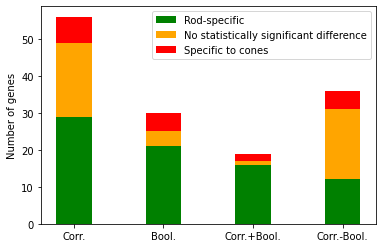

In [829]:
rod_spec = [29,21,16,12]
rod_eq = [20,4,1,19]
cone_spec = [7,5,2,5]

ind = np.arange(0, 2, 0.5)
width = 0.2
print(ind)
cone_spec_bottom = [rod_spec[i]+rod_eq[i] for i in range(len(rod_spec))]

p1 = plt.bar(ind, rod_spec, width, color = "green")
p2 = plt.bar(ind, rod_eq, width,
            bottom=rod_spec, color = "orange")
p3 = plt.bar(ind, cone_spec, width,
            bottom=cone_spec_bottom, color = "red")

plt.ylabel("Number of genes")
plt.xticks(ind, ["Corr.", "Bool.", "Corr.+Bool.", "Corr.-Bool."])
plt.legend((p1[0], p2[0], p3[0]), ("Rod-specific", "No statistically significant difference", "Specific to cones"))

plt.savefig("/Users/rohan/public_html/Hegemon/rod-celltype.jpg", dpi=800,transparent=True)
plt.show()

[0.  0.5 1.  1.5]


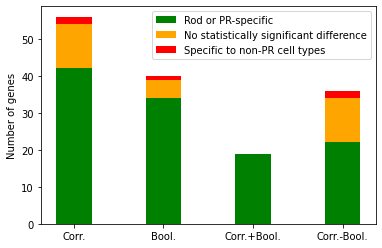

In [830]:
rodpr_spec = [42,34,19,22]
nonpr_spec = [2,1,0,2]
rodpr_eq = [12,5,0,12]

ind = np.arange(0, 2, 0.5)
width = 0.2
print(ind)
nonpr_spec_bottom = [rodpr_spec[i]+rodpr_eq[i] for i in range(len(rodpr_spec))]

p1 = plt.bar(ind, rodpr_spec, width, color = "green")
p2 = plt.bar(ind, rodpr_eq, width,
            bottom=rodpr_spec, color = "orange")
p3 = plt.bar(ind, nonpr_spec, width,
            bottom=nonpr_spec_bottom, color = "red")

plt.ylabel("Number of genes")
plt.xticks(ind, ["Corr.", "Bool.", "Corr.+Bool.", "Corr.-Bool."])
plt.legend((p1[0], p2[0], p3[0]), ("Rod or PR-specific", "No statistically significant difference", "Specific to non-PR cell types"))
plt.savefig("/Users/rohan/public_html/Hegemon/rod-cellclass.jpg", dpi=800,transparent=True)
plt.show()

[0.  0.5 1.  1.5]


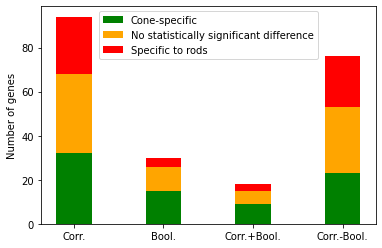

In [831]:
cone_spec = [32,15,9,23]
rod_spec = [26,4,3,23]
cone_eq = [36,11,6,30]

ind = np.arange(0, 2, 0.5)
width = 0.2
print(ind)
rod_spec_bottom = [cone_spec[i]+cone_eq[i] for i in range(len(cone_spec))]

p1 = plt.bar(ind, cone_spec, width, color = "green")
p2 = plt.bar(ind, cone_eq, width,
            bottom=cone_spec, color = "orange")
p3 = plt.bar(ind, rod_spec, width,
            bottom=rod_spec_bottom, color = "red")

plt.ylabel("Number of genes")
plt.xticks(ind, ["Corr.", "Bool.", "Corr.+Bool.", "Corr.-Bool."])
plt.legend((p1[0], p2[0], p3[0]), ("Cone-specific", "No statistically significant difference", "Specific to rods"))
plt.savefig("/Users/rohan/public_html/Hegemon/cone-cellclass.jpg", dpi=800,transparent=True)
plt.show()

[0.1 0.2]


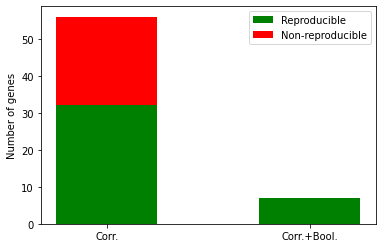

In [832]:
cone_rep = [32,7]
code_nrep = [24,0]


ind = np.array([0.1,0.2])
width = 0.05
print(ind)

p1 = plt.bar(ind, cone_rep, width, color = "green")
p2 = plt.bar(ind, code_nrep, width,
            bottom=cone_rep, color = "red")

plt.ylabel("Number of genes")
plt.xticks(ind, ["Corr.", "Corr.+Bool."])
plt.legend((p1[0], p2[0]), ("Reproducible", "Non-reproducible"))
plt.savefig("/Users/rohan/public_html/Hegemon/cone-repr.jpg", dpi=800,transparent=True)
plt.show()